# Credit EDA Case Study

By Shubhranshu Shekhar Patel - 
PGDDS Feb 2021

### Problem statement: 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

(H0) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

(H1) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Analysis of the data set has been done in Python on Jupyter Notebook


### Business Objective:

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

This will ensure that the consumers capable of repaying the loan are not rejected

Identification of such applicants using EDA is the aim of this case study


## 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## 2. Loading the data

In [2]:
#Reading application_data.csv
app_data = pd.read_csv("application_data.csv")


In [3]:
app_data.shape

(307511, 122)

In [4]:
pd.set_option("display.max_columns",122)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## 3. Handling Null Columns

In [5]:
# Number of null columns
sum(app_data.isnull().sum()>0)

67

In [6]:
# Null columns with null percentage in descending order
pd.set_option("display.max_rows",122)
null_per =((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending = False)
null_per

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

<AxesSubplot:>

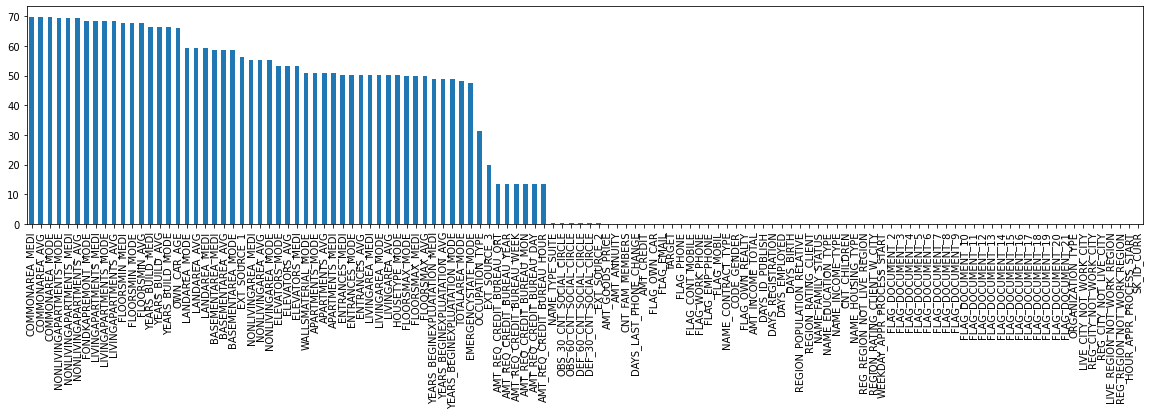

In [7]:
# plot of Null Percentages
plt.figure(figsize=(20,4))
null_per.plot(kind = 'bar')

<AxesSubplot:>

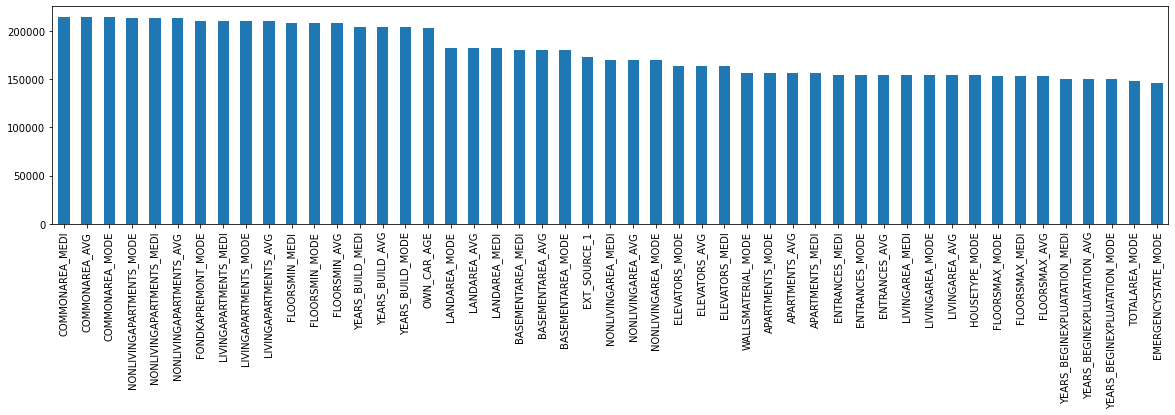

In [8]:
# Null columns having null values more than 35%

emptycol= app_data.isnull().sum().sort_values(ascending = False)
emptycol=emptycol[emptycol.values>(0.35*len(app_data))]
plt.figure(figsize=(20,4))
emptycol.plot(kind = 'bar')


In [9]:
len(emptycol)

49

In [10]:
# emptycol = list(emptycol[emptycol.values>=0.35].index)
# emptycol
# df.drop(labels=emptycol,axis=1,inplace=True)
# print(len(emptycol))

In [11]:
# Columns having null values more than 35%
emptycol 

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [12]:
# Columns to be deleted
empty_del = list(emptycol.index)
empty_del

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION

In [13]:
# Deleting null columns which have more than 35% null values
app_data.drop(labels=empty_del,axis=1,inplace=True)

In [14]:
# Shape of new data frame after deletion
app_data.shape

(307511, 73)

In [15]:
# Shape of new data frame after deletion
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
# Mathematical description of new data frame after deletion
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [17]:
# Number of columns having null values (having null values less than 35 %)
(app_data.isnull().sum()>1).sum()

17

In [18]:
# Checking the % of null values for each column in new dataset
null = app_data.isnull().sum()/len(app_data)*100
null.sort_values(ascending = False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

## 4.Dealing with missing values

In [19]:
# values 0f OCCUPATION_TYPE
app_data.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
app_data.OCCUPATION_TYPE.mode()

0    Laborers
dtype: object

##### Suggessions: we can impute the missing values with the mode since the occupation type is Laborers (object type)

In [21]:
# for 'AMT_REQ_CREDIT_BUREAU_YEAR'
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [22]:
app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [23]:
# for AMT_REQ_CREDIT_BUREAU_MON
app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [24]:
#for AMT_REQ_CREDIT_BUREAU_WEEK
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [25]:
# for AMT_REQ_CREDIT_BUREAU_DAY
app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [26]:
# for AMT_REQ_CREDIT_BUREAU_HOUR
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [27]:
# for AMT_REQ_CREDIT_BUREAU_QRT
app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

##### Suggessions:  For the above mentioned columns we can impute the missing values with the mode which is the value '0'. Since  replacing missing values with the most frequent value would make more sense.

In [28]:
# For AMT_GOODS_PRICE
app_data.AMT_GOODS_PRICE.value_counts() 

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

##### Suggessions: since this a numerical value we can replace the missing values with the median

In [29]:
app_data.AMT_GOODS_PRICE.median()

450000.0

In [30]:
# For AMT_ANNUITY 
app_data.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

##### Suggessions: since this again a numerical value we can replace the missing values with the median

In [31]:
app_data.AMT_ANNUITY.median()

24903.0

## 5.Errors in Data types and Data

#### In the cells shown below we have Changed the 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' which had negative or mixed values and imputed them with absolute values for our analysis.

In [32]:
# Checking the values present in columns starting with 'DAYS'
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [33]:
# The columns starting with 'DAYS'
filter_col = [col for col in app_data if col.startswith('DAYS')]
filter_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [34]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive
app_data[filter_col]= abs(app_data[filter_col])

In [35]:
print(app_data['DAYS_BIRTH'].unique())
print(app_data['DAYS_EMPLOYED'].unique())
print(app_data['DAYS_REGISTRATION'].unique())
print(app_data['DAYS_ID_PUBLISH'].unique())
print(app_data['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120.  291. 2531. ... 6194. 5854. 6211.]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [36]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean         4986.120328      2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min             0.000000         0.000000       0.000000        0.000000   
25%          2010.000000      1720.000000       1.000000        1.000000   
50%          4504.000000      3254.000000       1.000000        1.000000   
75%          7479.500000      4299.000000       1.000000        1.000000   
max         24672.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

In [37]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [38]:
app_data.shape

(307511, 73)

In [39]:
# For CODE_GENDER
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

##### Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [40]:
# Replacing XNA value with F
app_data.loc[app_data.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [41]:
# For ORGANIZATION_TYPE
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#####  Imputing the value'XNA'  to np.NaN which means not available for the column 'ORGANIZATION_TYPE'

In [42]:
app_data = app_data.replace('XNA',np.NaN)

In [43]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [44]:
app_data.ORGANIZATION_TYPE.isnull().sum()

55374

#### Binning of continuous variables

In [45]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_data['AMT_INCOME_RANGE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_INCOME_RANGE'].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [46]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
app_data['AMT_CREDIT_RANGE'] = pd.qcut(app_data.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data['AMT_CREDIT_RANGE'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [47]:
# Converting 'DAYS_BIRTH' to years
app_data['DAYS_BIRTH'] = (app_data['DAYS_BIRTH']/365).astype(int)
app_data['DAYS_BIRTH'].head()

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int32

In [48]:
app_data['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [49]:
# Biining 'DAYS_BIRTH'
app_data['DAYS_BIRTH_BINS']=pd.cut(app_data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app_data['DAYS_BIRTH_BINS'].head()

0    Very_Young
1    Middle_Age
2    Middle_Age
3    Middle_Age
4    Middle_Age
Name: DAYS_BIRTH_BINS, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [50]:
app_data['DAYS_BIRTH_BINS'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: DAYS_BIRTH_BINS, dtype: int64

## 6.Analysis

#### Finding Outliers

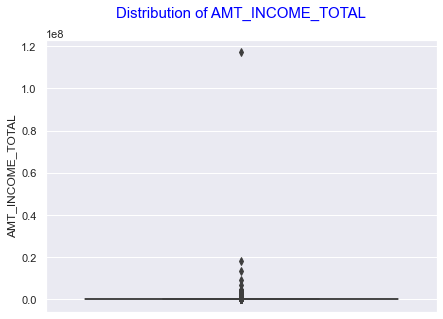

In [51]:
# boxplot for 'AMT_INCOME_TOTAL' column to check the outliers
plt.figure(figsize=[7,5])
sns.set(style="darkgrid")
plt.title("Distribution of AMT_INCOME_TOTAL\n",fontsize = 15,color = "blue")
sns.boxplot(data = app_data,y= "AMT_INCOME_TOTAL",color ="brown" )
plt.show()



#### Inference: Here, in the coloumn 'AMT_INCOME_TOTAL' which tells us the income of the client. We observe there is surely an outlier.

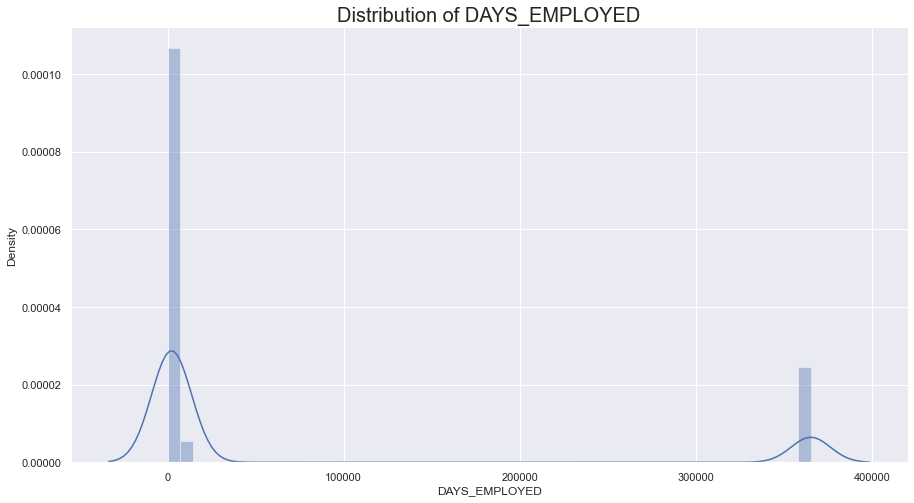

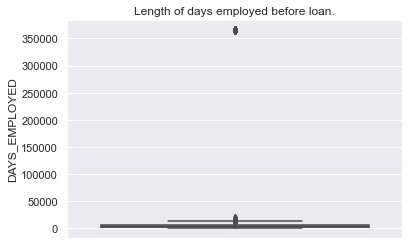

In [52]:
# distribution of 'DAYS_EMPLOYED'
plt.figure(figsize = [15,8])
sns.distplot(app_data['DAYS_EMPLOYED'])
plt.title('Distribution of DAYS_EMPLOYED', fontdict={'fontsize':20} )
plt.show()

sns.boxplot(y=app_data['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

##### Inference: Here, in the coloumn 'DAYS_EMPLOYED' which tells how many days before the application the person started current employment. We observe a value which is greater that 20,000 which is surely an outlier because 25,000/365 will be around 54 years. Considering that a person started working at age of 21, the person will be 21+54 will turn out to be 75 years old.

In [53]:

#Deriving variable "Years Employed" from days employed
app_data['YEARS_EMPLOYED'] = (app_data['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=app_data[app_data.TARGET==1] 
nondefaulters=app_data[app_data.TARGET==0]

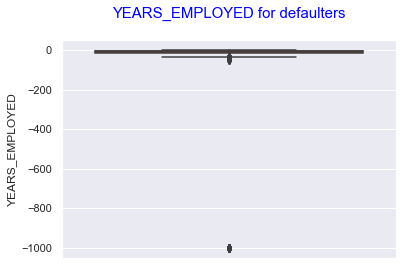

In [54]:
plt.title("YEARS_EMPLOYED for defaulters\n",fontsize = 15,color = "blue")
sns.boxplot(data = app_data,y= "YEARS_EMPLOYED",color ="brown" )
plt.xticks(rotation=180)
plt.show()

##### Inference:A large number of entries have 0 which means, a lot of people don't work.


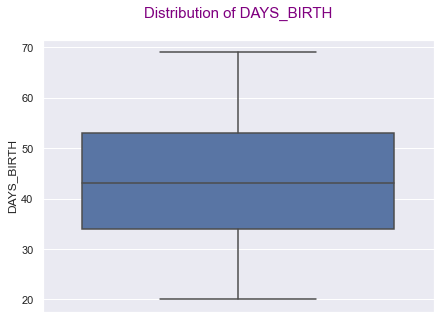

In [55]:
# For "DAYS_BIRTH"
plt.figure(figsize=[7,5])
plt.title("Distribution of DAYS_BIRTH\n",fontsize = 15,color= "purple")
sns.boxplot(data = app_data,y= "DAYS_BIRTH" )
plt.show()

##### Inference:There are no outliers present in this column.

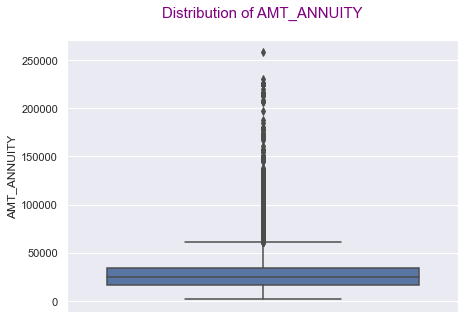

In [56]:
# For AMT_ANNUITY
plt.figure(figsize=[7,5])
plt.title("Distribution of AMT_ANNUITY\n",fontsize = 15,color = "purple")
sns.boxplot(data = app_data,y= "AMT_ANNUITY")
plt.show()

##### Inference: Here, in the coloumn 'AMT_AANNUITY' which tells the loan annuity. We observe a value which is greater that ~250000 which is surely an outlier.

<AxesSubplot:title={'center':'Distribution of AMT_CREDIT\n'}, ylabel='AMT_CREDIT'>

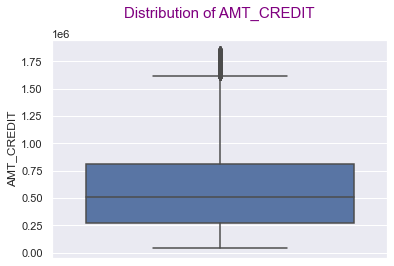

In [57]:
#Removing all entries above 99 percentile
ad=app_data[app_data.AMT_CREDIT<np.nanpercentile(app_data['AMT_CREDIT'], 99)]

#update dataframes
defaulters=ad[ad.TARGET==1] 
nondefaulters=ad[ad.TARGET==0]
plt.title("Distribution of AMT_CREDIT\n",fontsize = 15,color = "purple")
sns.boxplot(data = ad,y= "AMT_CREDIT" )

we observe that the credit amount lies between 250000 to around 500000 for defaulters



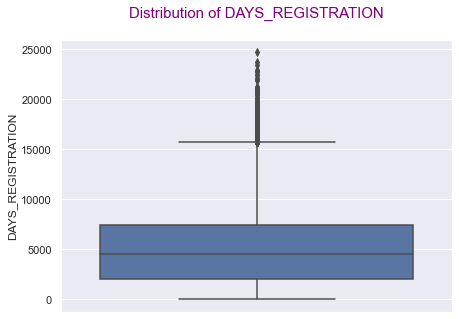

In [58]:
# for "DAYS_REGISTRATION"
plt.figure(figsize=[7,5])
plt.title("Distribution of DAYS_REGISTRATION\n",fontsize = 15,color = "purple")
sns.boxplot(data = app_data,y= "DAYS_REGISTRATION" )
plt.show()

##### Inference: Here, in the coloumn 'DAYS_REGISTRATION' which how many days before the application did client change his registration. We observe a value which is greater that 24000 which is surely an outlier.

#### Checking the distribution

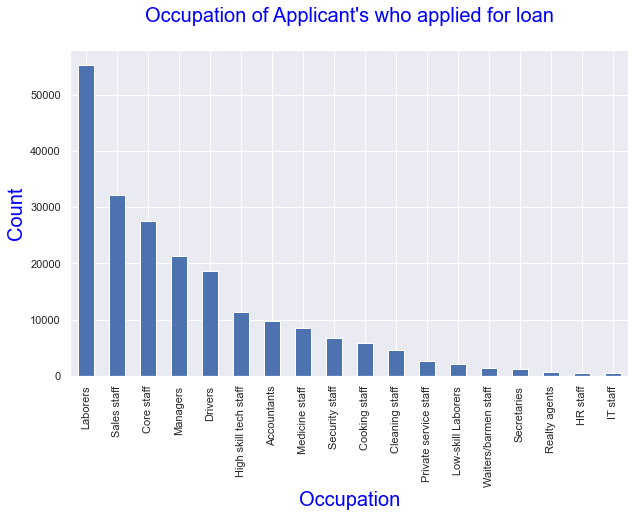

In [59]:
# Distribution of 'OCCUPATION_TYPE'
plt.figure(figsize = [10,6])
app_data["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.title("Occupation of Applicant\'s who applied for loan\n",fontsize = 20,color = "blue")
plt.xlabel("Occupation",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

##### Inference:We can observer that Labourers, Sales Staff and Core Staff constitute the majority whereas IT Staff is on the lower side.

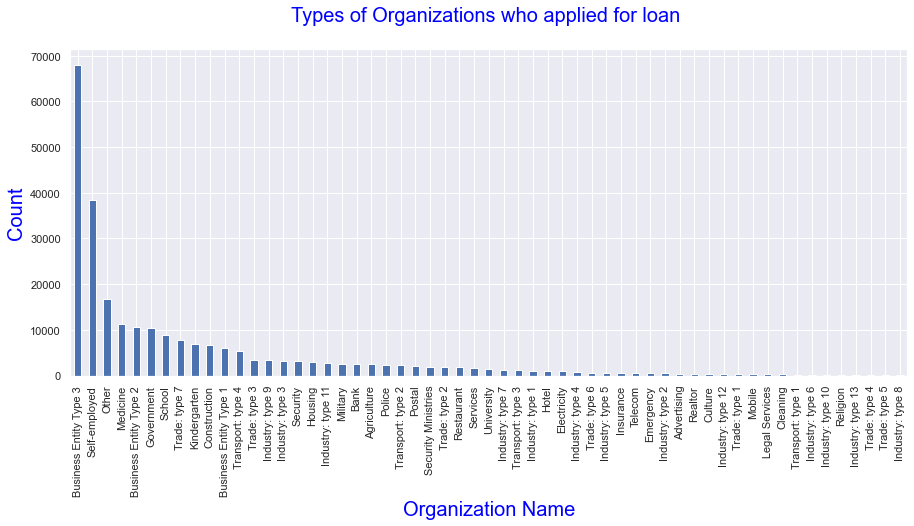

In [60]:
# Distribution of 'ORGANIZATION_TYPE'
plt.figure(figsize = [15,6])
app_data["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan \n",fontsize = 20,color = "blue")
plt.xlabel("Organization Name",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

##### Inference:We can observe that Business Entity Type 3 organizations have majority of the loan applications.

### Checking Imbalance

In [61]:
app_data["TARGET"].value_counts(normalize = True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

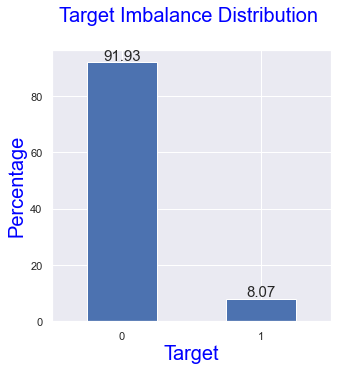

In [62]:
plt.figure(figsize = [5,5])
plots = (app_data["TARGET"].value_counts(normalize = True)*100).plot.bar()
plt.title("Target Imbalance Distribution \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Target",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks()
plt.show()

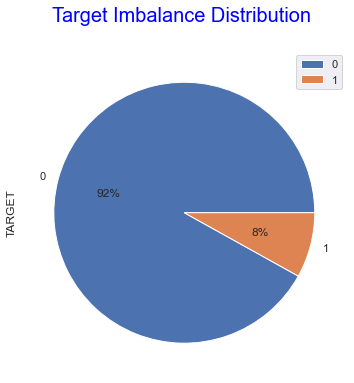

In [63]:
plt.figure(figsize = [15,6])
app_data["TARGET"].value_counts(normalize = True).plot.pie(autopct='%1.0f%%')
plt.title("Target Imbalance Distribution \n",fontsize = 20,color = "blue")
plt.legend()
plt.show()

##### Inference:The imbalance is high between target variables.

## Dividing the dataset into two different datasets based upon 'Target' value.

In [64]:
# Dividing the original dataset into two different datasets depending upon the target value
target0 = app_data.loc[app_data.TARGET == 0]
target1 = app_data.loc[app_data.TARGET == 1]

## Univariate Analysis of Categorical Variables

### Gender Distribution

In [65]:
# Gender Distibution of Loan Non-Payment Difficulties
target0["CODE_GENDER"].value_counts(normalize = True)*100

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

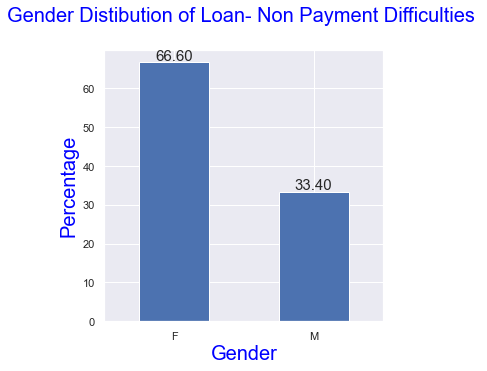

In [66]:
plt.figure(figsize = [5,5])
plots = (target0["CODE_GENDER"].value_counts(normalize = True)*100).plot.bar()
plt.title("Gender Distibution of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xticks(rotation =0)
plt.xlabel("Gender",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

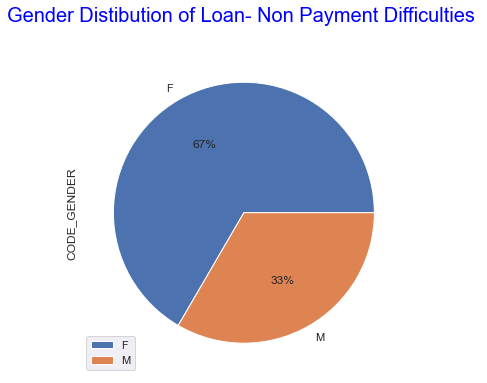

In [67]:
plt.figure(figsize = [15,6])
target0["CODE_GENDER"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Gender Distibution of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend()
plt.show()

In [68]:
# Gender Distibution of Loan Payment Difficulties
target1["CODE_GENDER"].value_counts(normalize =True)*100

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

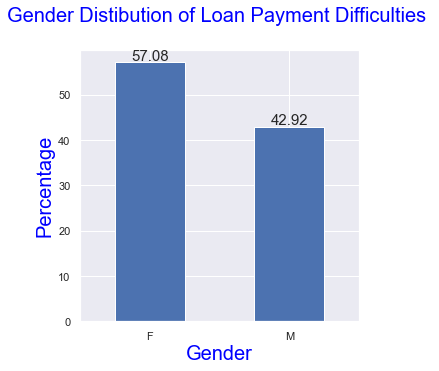

In [69]:
plt.figure(figsize = [5,5])
plots =(target1["CODE_GENDER"].value_counts(normalize = True)*100).plot.bar()
plt.title("Gender Distibution of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Gender",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

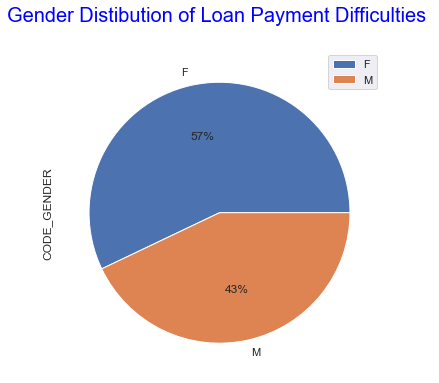

In [70]:
plt.figure(figsize = [15,6])
target1["CODE_GENDER"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Gender Distibution of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend()
plt.show()

##### Inference:Comaparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are the majority in both the cases although there is an increase in the percentage in Male Payment Difficulties from Non-Payment Difficulties

### Income Source

In [71]:
# Income sources of Loan- Non Payment Difficulties
target0["NAME_INCOME_TYPE"].value_counts(normalize = True)*100


Working                 50.780725
Commercial associate    23.438373
Pensioner               18.529393
State servant            7.235590
Student                  0.006367
Unemployed               0.004952
Businessman              0.003537
Maternity leave          0.001061
Name: NAME_INCOME_TYPE, dtype: float64

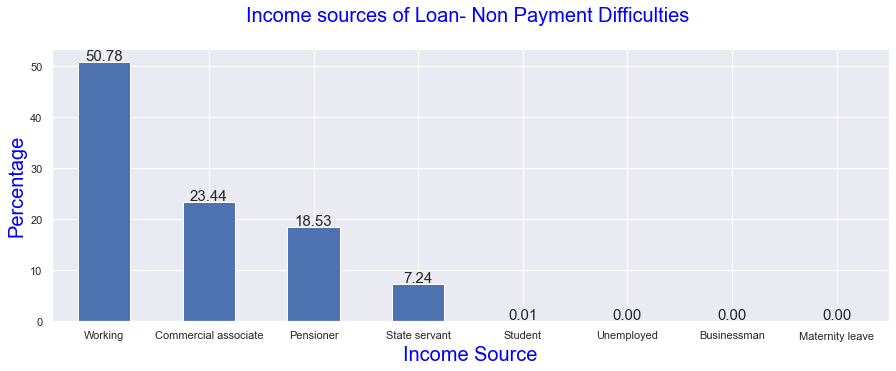

In [72]:
plt.figure(figsize = [15,5])
plots = (target0["NAME_INCOME_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Income sources of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xlabel("Income Source",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

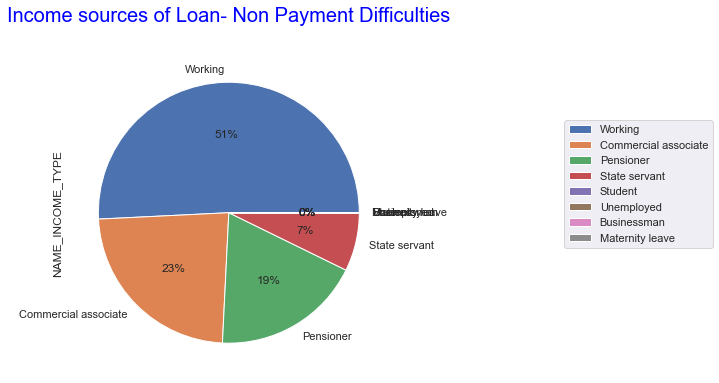

In [73]:
plt.figure(figsize = [25,6])
target0["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income sources of Loan- Non Payment Difficulties\n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [74]:
# Income sources of Loan Payment Difficulties
target1["NAME_INCOME_TYPE"].value_counts(normalize = True)*100

Working                 61.325277
Commercial associate    21.591138
Pensioner               12.012085
State servant            5.031219
Unemployed               0.032226
Maternity leave          0.008056
Name: NAME_INCOME_TYPE, dtype: float64

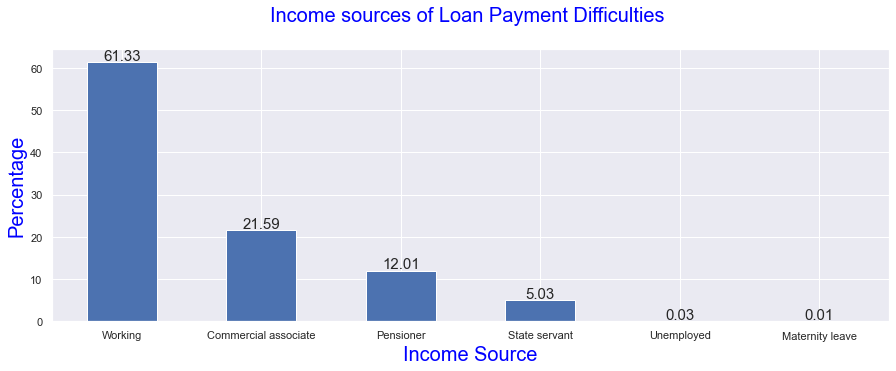

In [75]:
plt.figure(figsize = [15,5])
plots = (target1["NAME_INCOME_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Income sources of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income Source",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

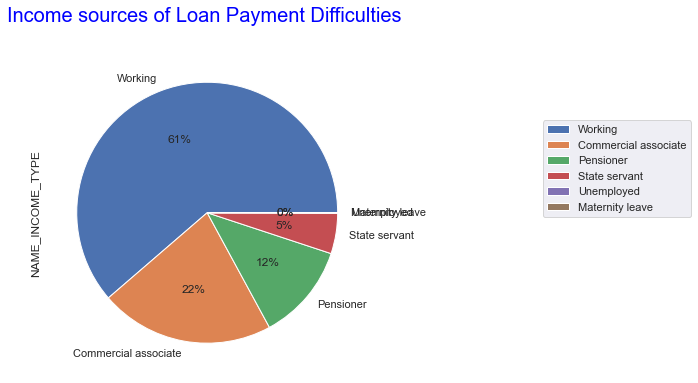

In [76]:
plt.figure(figsize = [15,6])
target1["NAME_INCOME_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income sources of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference:We observe a decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working when compared the percentages of both Payment Difficulties and non-Payment Difficulties.

### Family Status

In [77]:
# Family Status of Loan- Non Payment Difficulties
target0["NAME_FAMILY_STATUS"].value_counts(normalize = True)*100

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

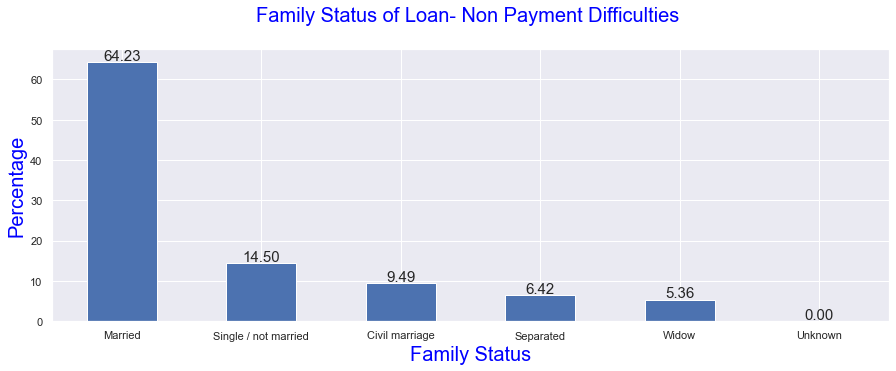

In [78]:
plt.figure(figsize = [15,5])
plots = (target0["NAME_FAMILY_STATUS"].value_counts(normalize = True)*100).plot.bar()
plt.title("Family Status of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Family Status",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

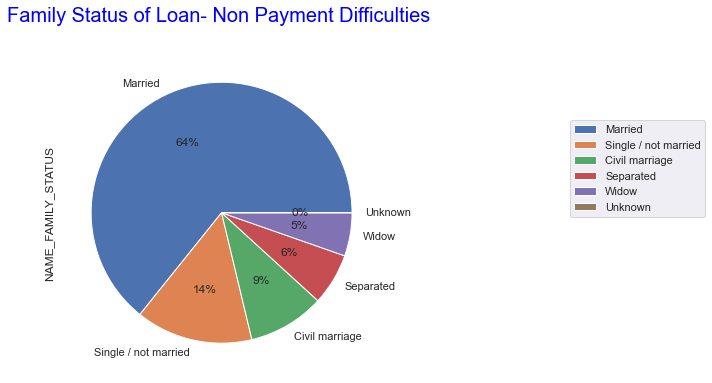

In [79]:
plt.figure(figsize = [15,6])
target0["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Family Status of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [80]:
# Family Status of Loan Payment Difficulties
target1["NAME_FAMILY_STATUS"].value_counts(normalize = True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

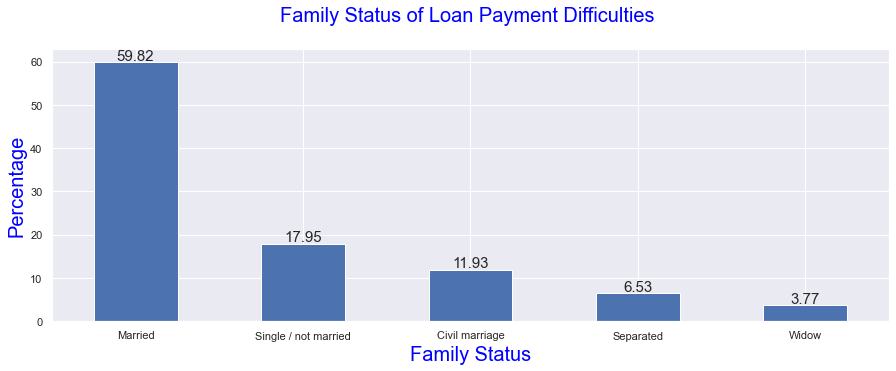

In [81]:
plt.figure(figsize = [15,5])
plots = (target1["NAME_FAMILY_STATUS"].value_counts(normalize = True)*100).plot.bar()
plt.title("Family Status of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Family Status",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

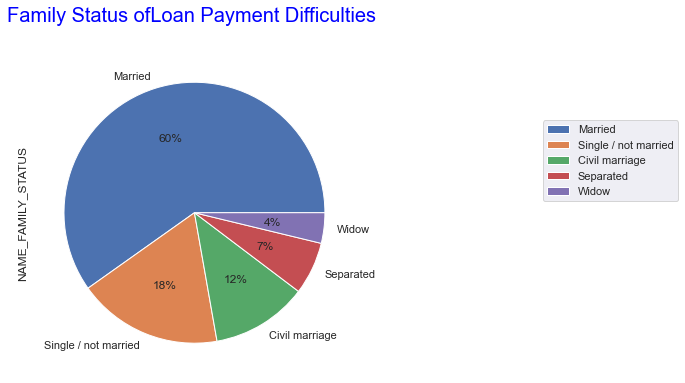

In [82]:
plt.figure(figsize = [15,6])
target1["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Family Status ofLoan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference:We observe a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties


### Education

In [83]:
# Education of Loan- Non Payment Difficulties
target0["NAME_EDUCATION_TYPE"].value_counts(normalize = True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

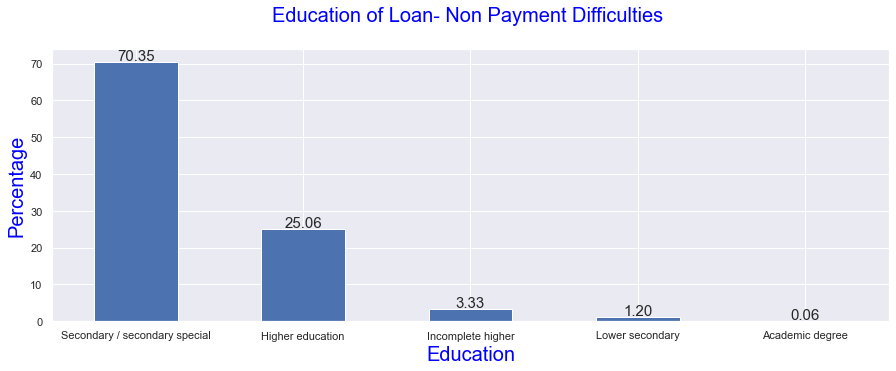

In [84]:
plt.figure(figsize = [15,5])
plots = (target0["NAME_EDUCATION_TYPE"].value_counts(normalize = True)*100).plot.bar()
plt.title("Education of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Education",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

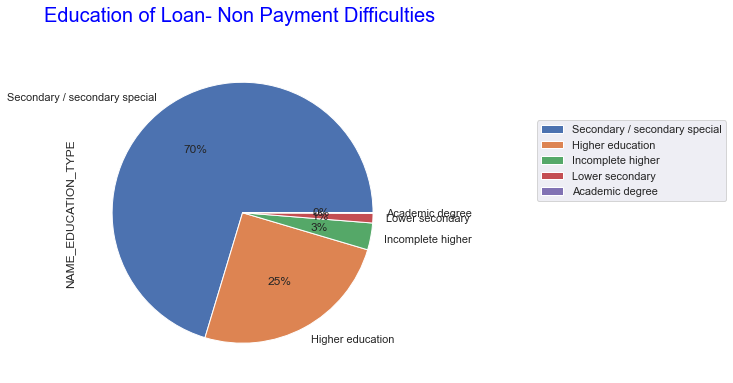

In [85]:
plt.figure(figsize = [15,6])
target0["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Education of Loan- Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [86]:
# Education of Loan Payment Difficulties
target1["NAME_EDUCATION_TYPE"].value_counts(normalize =True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

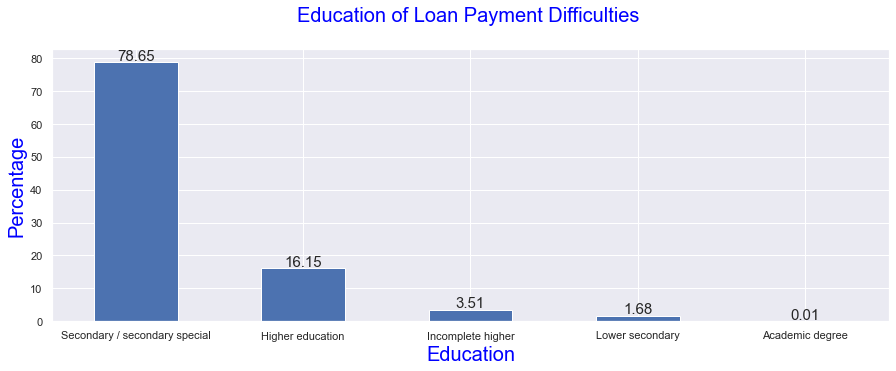

In [87]:
plt.figure(figsize = [15,5])
plots = (target1["NAME_EDUCATION_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Education of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Education",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

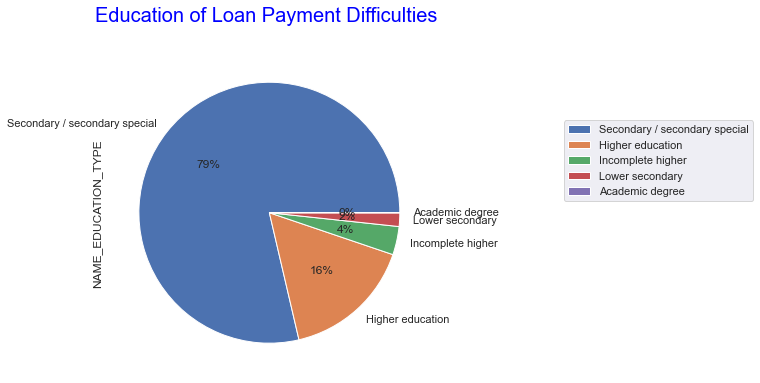

In [88]:
plt.figure(figsize = [15,6])
target1["NAME_EDUCATION_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Education of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of Loan Payment Difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties

### Housing

In [89]:
# Type of House of Loan- Non Payment Difficulties
target0["NAME_HOUSING_TYPE"].value_counts(normalize = True)*100

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64

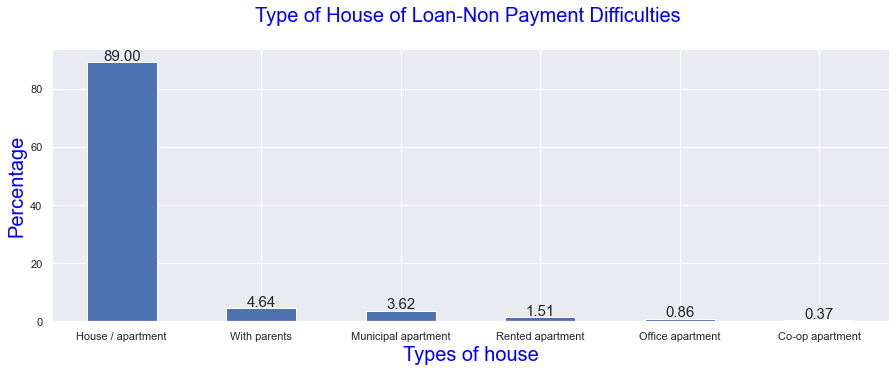

In [90]:
plt.figure(figsize = [15,5])
plots = (target0["NAME_HOUSING_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Type of House of Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Types of house",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

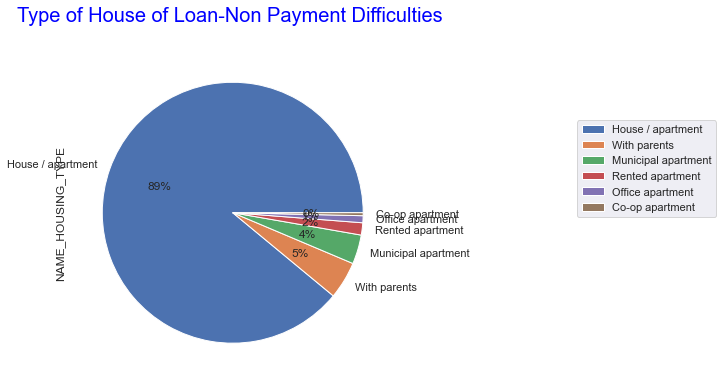

In [91]:
plt.figure(figsize = [15,6])
target0["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Type of House of Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [92]:
# Type of House of Payment Difficulties
target1["NAME_HOUSING_TYPE"].value_counts(normalize = True)*100

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64

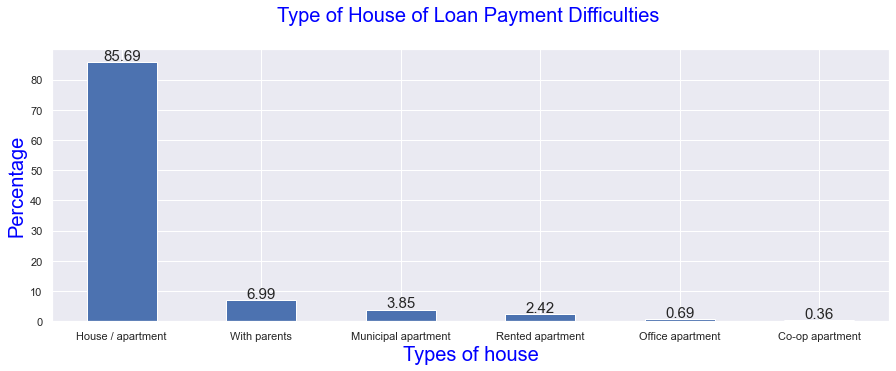

In [93]:
plt.figure(figsize = [15,5])
plots = (target1["NAME_HOUSING_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Type of House of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Types of house",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

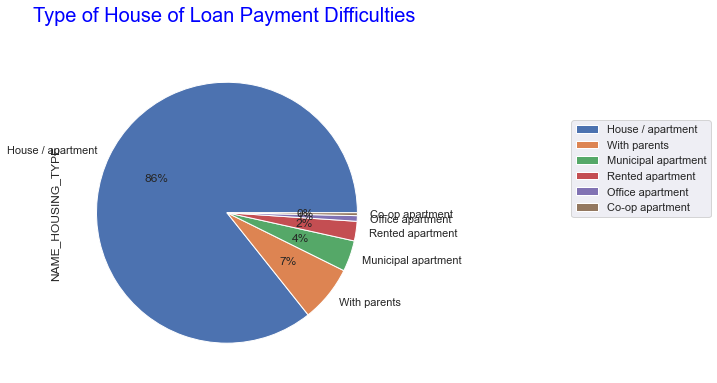

In [94]:
plt.figure(figsize = [15,6])
target1["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Type of House of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe an increase in the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment Difficulties and non-Payment Difficulties

### Income Range

In [95]:
# Income range of Loan-Non Payment Difficulties
target0["AMT_INCOME_RANGE"].value_counts(normalize = True)*100

MEDIUM       34.617915
LOW          29.125602
VERY_LOW     20.675237
HIGH         10.905032
VERY_HIGH     4.676213
Name: AMT_INCOME_RANGE, dtype: float64

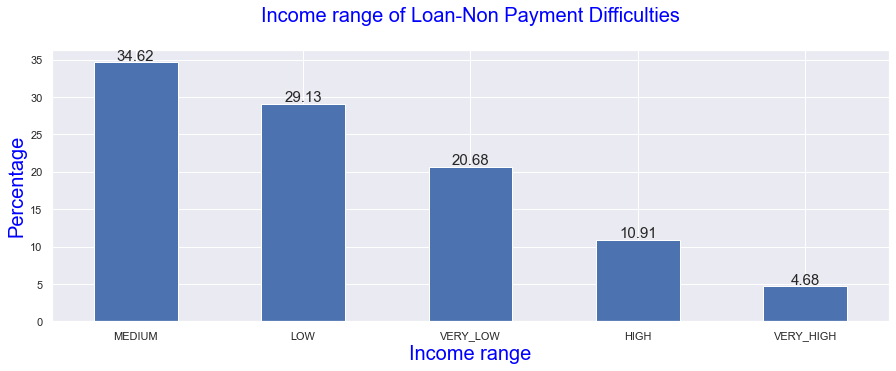

In [96]:
plt.figure(figsize = [15,5])
plots = (target0["AMT_INCOME_RANGE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Income range of Loan-Non Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income range",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

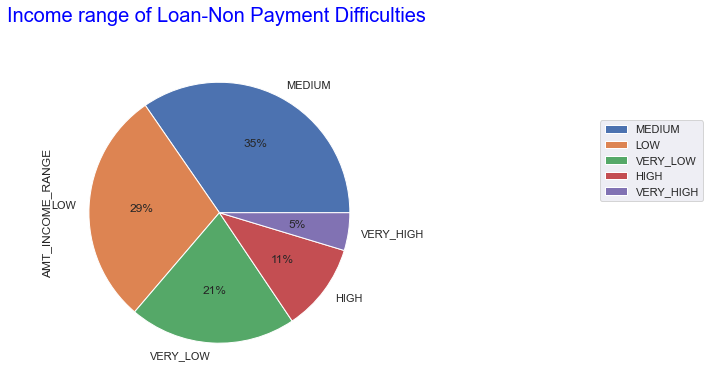

In [97]:
plt.figure(figsize = [15,6])
target0["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income range of Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [98]:
# Income range of Loan Payment Difficulties
target1["AMT_INCOME_RANGE"].value_counts(normalize = True)*100

MEDIUM       35.339376
LOW          31.238671
VERY_LOW     21.047331
HIGH          9.087613
VERY_HIGH     3.287009
Name: AMT_INCOME_RANGE, dtype: float64

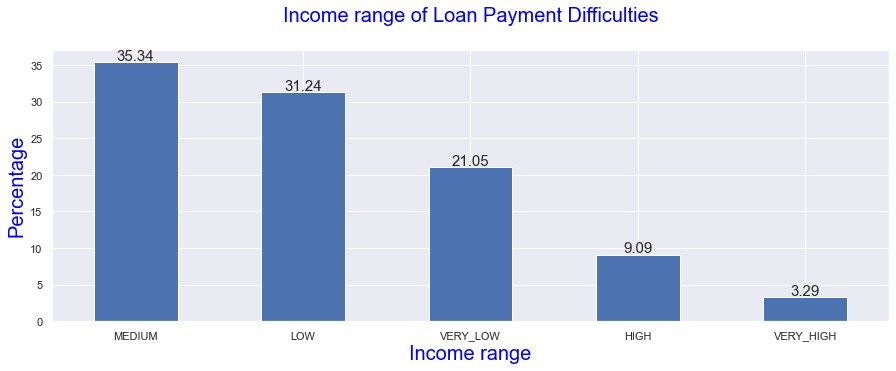

In [99]:
plt.figure(figsize = [15,5])
plots = (target1["AMT_INCOME_RANGE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Income range of Loan Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Income range",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

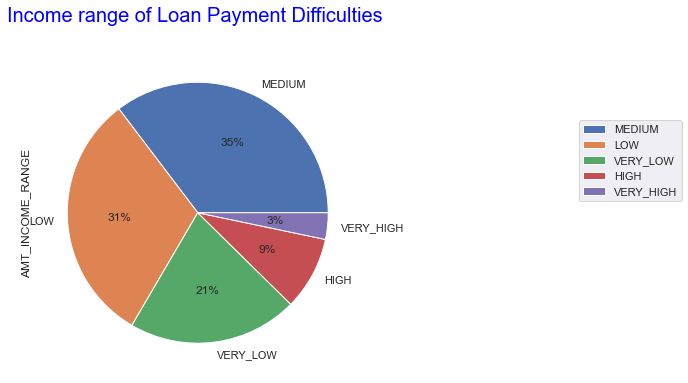

In [100]:
plt.figure(figsize = [15,6])
target1["AMT_INCOME_RANGE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Income range of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe an increase in the percentage of Loan Payment Difficulties whose income is low when compared with the percentages of Payment Difficulties and Loan-Non Payment Difficulties

### Age

In [101]:
# Age of Loan-Non Payment Difficulties
target0["DAYS_BIRTH_BINS"].value_counts(normalize = True)*100

Middle_Age        61.012219
Young             24.015339
Senior_Citizen     9.877744
Very_Young         5.094699
Name: DAYS_BIRTH_BINS, dtype: float64

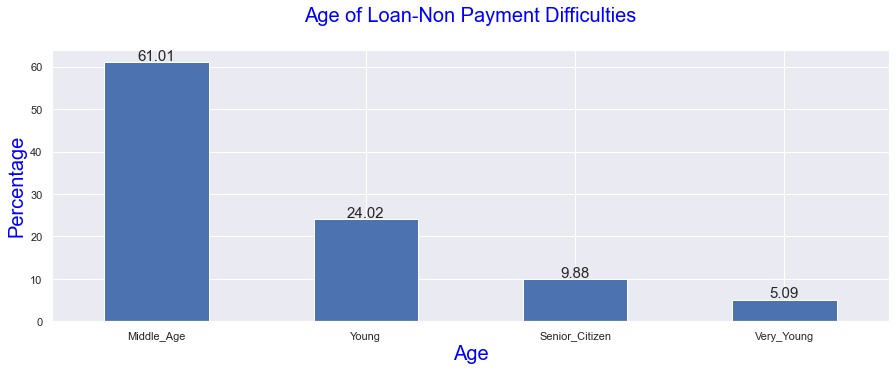

In [102]:
plt.figure(figsize = [15,5])
plots = (target0["DAYS_BIRTH_BINS"].value_counts(normalize =True)*100).plot.bar()
plt.title("Age of Loan-Non Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Age",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

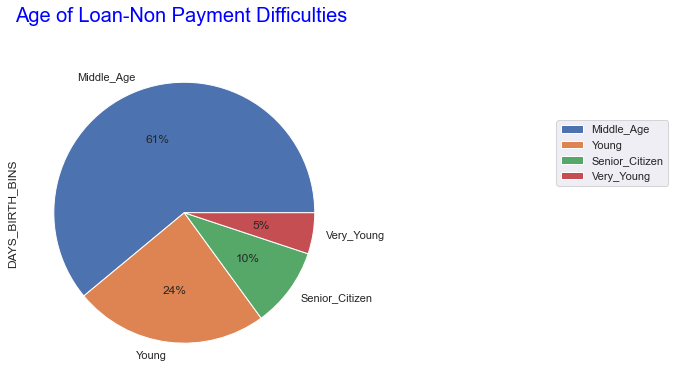

In [103]:
plt.figure(figsize = [15,6])
target0["DAYS_BIRTH_BINS"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Age of Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [104]:
# Age of Loan Payment Difficulties
target1["DAYS_BIRTH_BINS"].value_counts(normalize = True)*100

Middle_Age        54.086606
Young             32.374622
Very_Young         7.718026
Senior_Citizen     5.820745
Name: DAYS_BIRTH_BINS, dtype: float64

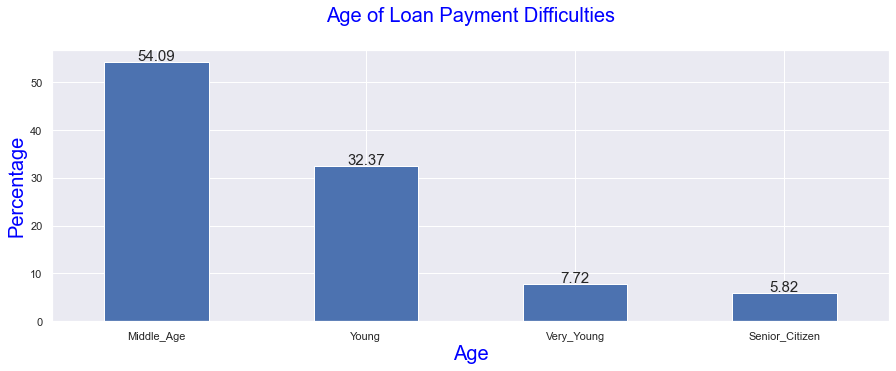

In [105]:
plt.figure(figsize = [15,5])
plots = (target1["DAYS_BIRTH_BINS"].value_counts(normalize =True)*100).plot.bar()
plt.title("Age of Loan Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Age",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

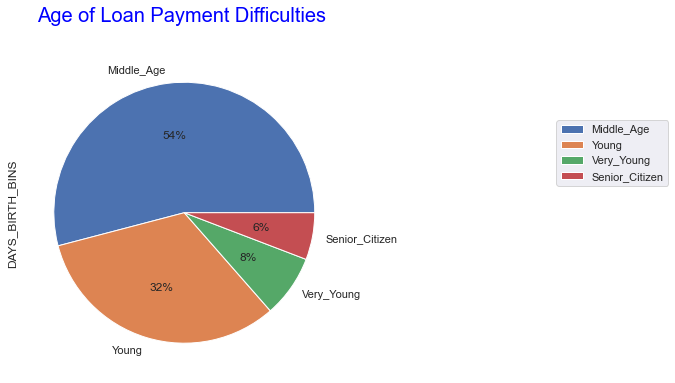

In [106]:
plt.figure(figsize = [15,6])
target1["DAYS_BIRTH_BINS"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Age of Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe that there is an increase in the percentage of Loan Payment Difficulties who are young in age when compared to the percentages of Payment Difficulties and Loan-Non Payment Difficulties.

### Type of loan

In [107]:
# Types of Loans taken by Loan-Non Payment Difficulties 
target0["NAME_CONTRACT_TYPE"].value_counts(normalize =True)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

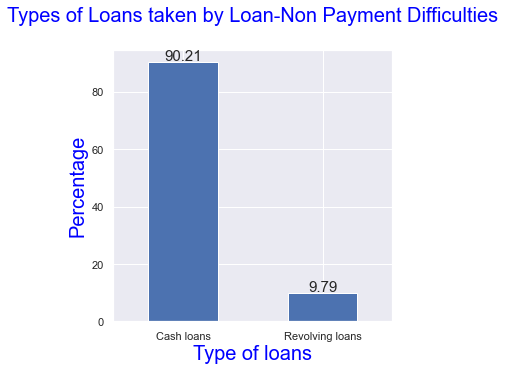

In [108]:
plt.figure(figsize = [5,5])
plots = (target0["NAME_CONTRACT_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Types of Loans taken by Loan-Non Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Type of loans",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

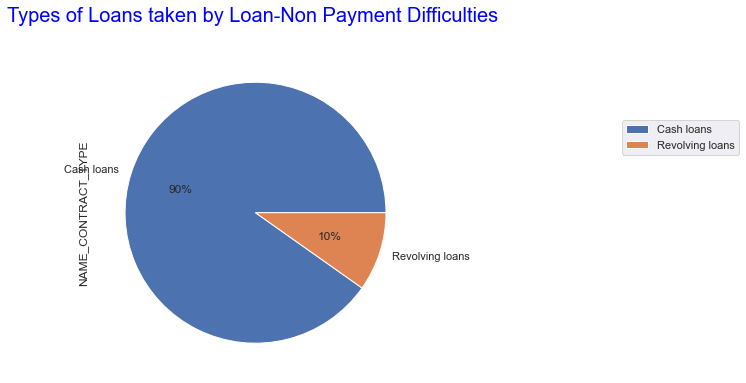

In [109]:
plt.figure(figsize = [15,6])
target0["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Types of Loans taken by Loan-Non Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [110]:
# Types of Loans taken by Loan Payment Difficulties 
target1["NAME_CONTRACT_TYPE"].value_counts(normalize =True)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

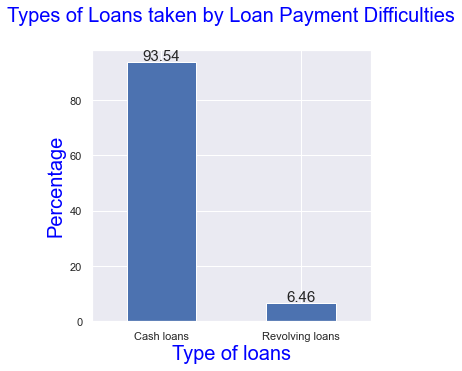

In [111]:
plt.figure(figsize = [5,5])
plots = (target1["NAME_CONTRACT_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Types of Loans taken by Loan Payment Difficulties\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.xlabel("Type of loans",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.show()

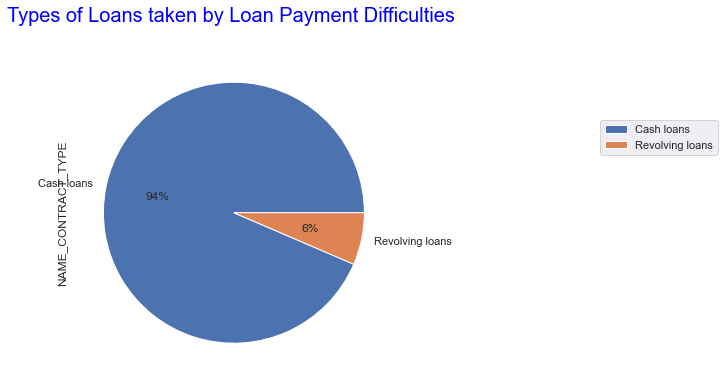

In [112]:
plt.figure(figsize = [15,6])
target1["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Types of Loans taken by Loan Payment Difficulties \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We can observe that cash loans are preffered by both Loan Payment Difficulties and Loan-Non Payment Difficulties although there is a decrease in the percentage of Payment Difficulties who opt for revolving loans.

### Accompanyed By

In [113]:
# Loan-Non Payment Difficulties are Accompanied by
target0["NAME_TYPE_SUITE"].value_counts(normalize =True)*100

Unaccompanied      81.072180
Family             13.195293
Spouse, partner     3.721613
Children            1.075093
Other_B             0.567035
Other_A             0.280675
Group of people     0.088111
Name: NAME_TYPE_SUITE, dtype: float64

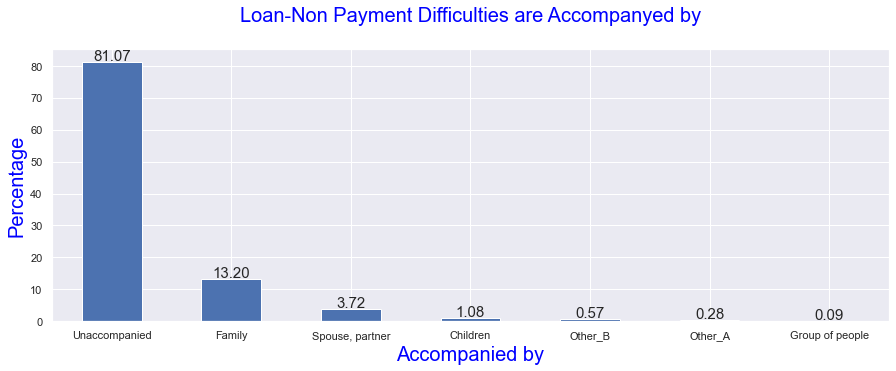

In [114]:
plt.figure(figsize = [15,5])
plots = (target0["NAME_TYPE_SUITE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Loan-Non Payment Difficulties are Accompanyed by\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Accompanied by",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

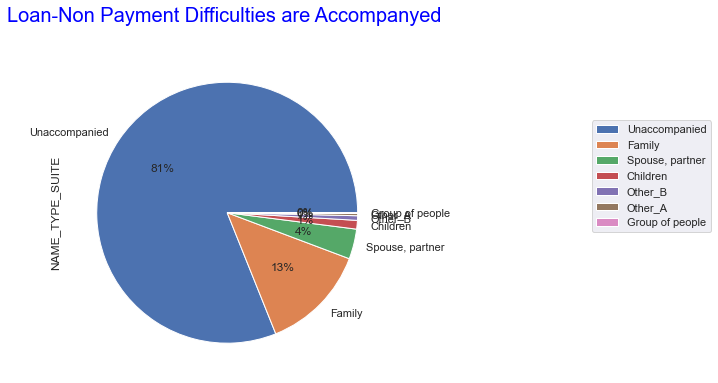

In [115]:
plt.figure(figsize = [15,6])
target0["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Loan-Non Payment Difficulties are Accompanyed \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

In [116]:
# Loan-Non Payment Difficulties are Accompanied by
target1["NAME_TYPE_SUITE"].value_counts(normalize =True)*100

Unaccompanied      82.153100
Family             12.155120
Spouse, partner     3.615431
Children            0.973541
Other_B             0.702888
Other_A             0.307009
Group of people     0.092911
Name: NAME_TYPE_SUITE, dtype: float64

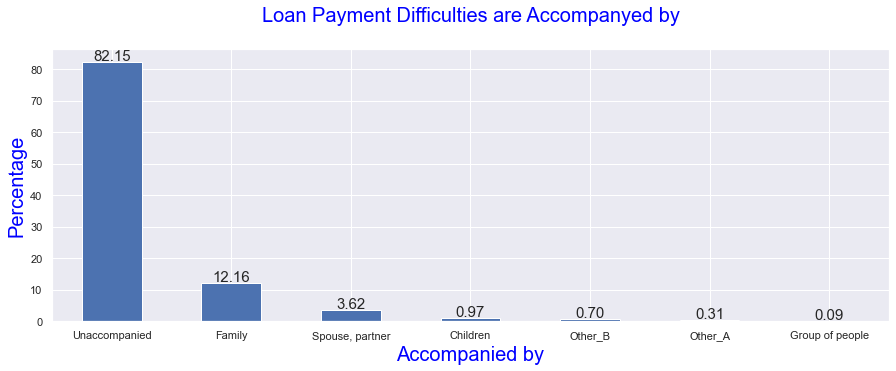

In [117]:
plt.figure(figsize = [15,5])
plots = (target1["NAME_TYPE_SUITE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Loan Payment Difficulties are Accompanyed by\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Accompanied by",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

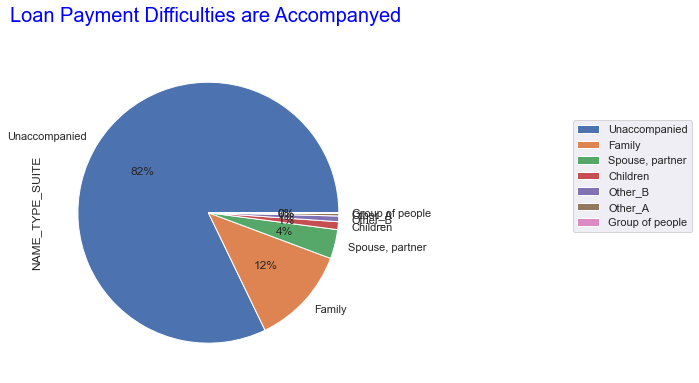

In [118]:
plt.figure(figsize = [15,6])
target1["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Loan Payment Difficulties are Accompanyed \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We do not observe any major changes here.

### Organization Type

In [119]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
target0["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    61669
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transport: type 3          1000
Industry

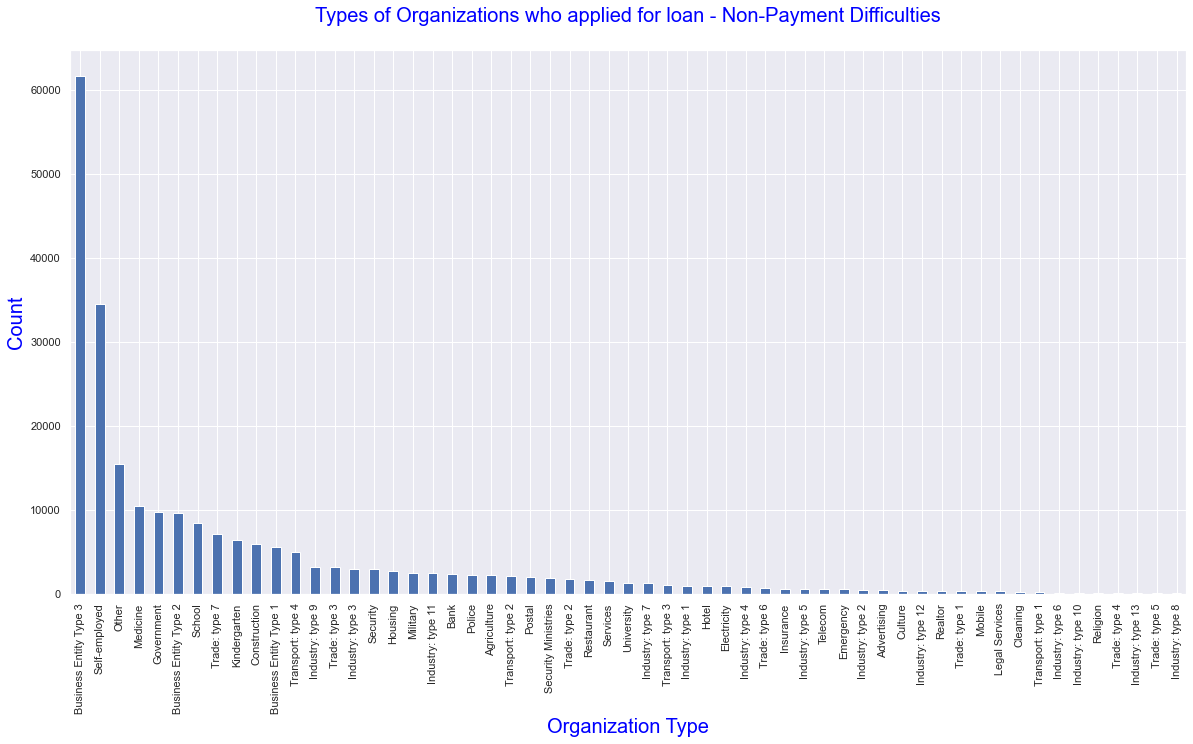

In [120]:
plt.figure(figsize = [20,10])
plots = target0["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan - Non-Payment Difficulties\n",fontsize = 20,color = "blue")
plt.xlabel("Organization Type",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 90)
plt.show()

In [121]:
# Types of Organizations who applied for loan - Non-Payment Difficulties
target1["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    6323
Self-employed             3908
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry: type 4            89
Universi

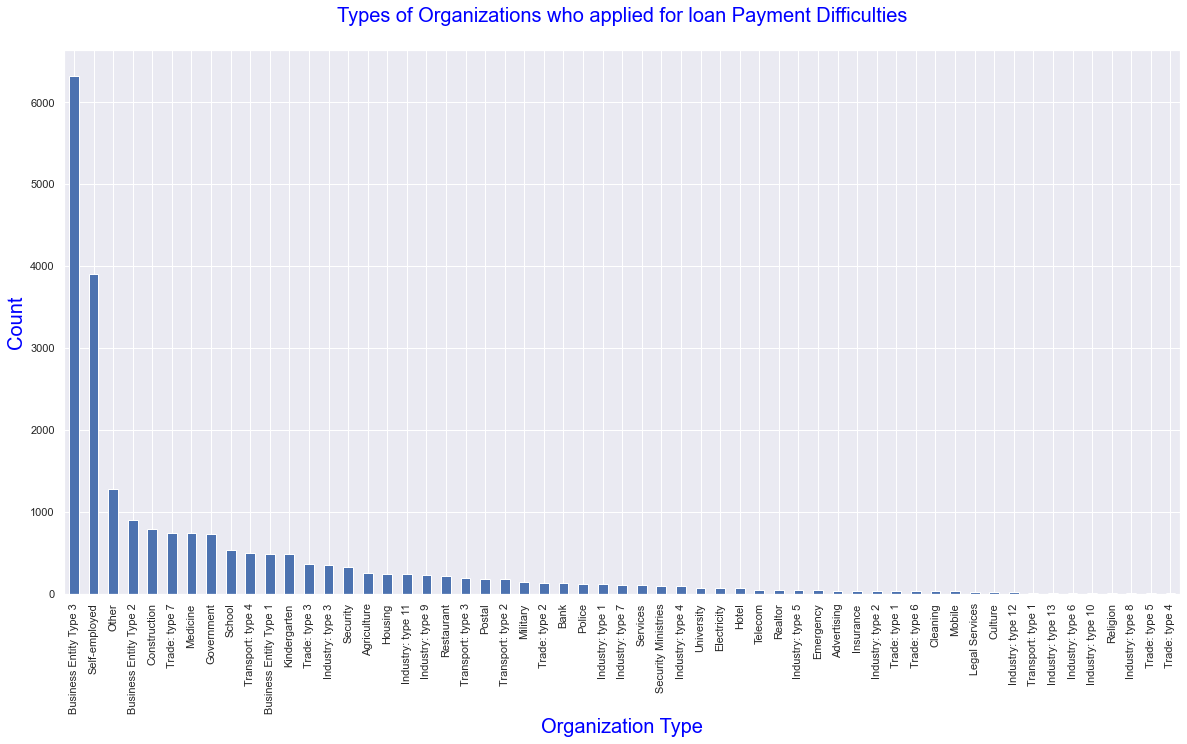

In [122]:
plt.figure(figsize = [20,10])
plots = target1["ORGANIZATION_TYPE"].value_counts().plot.bar()
plt.title("Types of Organizations who applied for loan Payment Difficulties\n",fontsize = 20,color = "blue")
plt.xlabel("Organization Type",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 90)
plt.show()

##### Inference: We can observe no major changes here.

## Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

### Function for univariate plots

In [123]:
def uni(df,col):
    plt.figure(figsize =[15,5])
    plt.subplot(1,2,1)
    sns.set(style="darkgrid")
    sns.distplot(df[~df[col].isnull()][col])
    plt.title("Distribution Plot \n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.subplot(1,2,2)
    sns.boxplot(data = df,y= col ,color ="lightblue" )
    plt.title("Box Plot\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.yscale('log')
    plt.show()


    

### Loan Annuity

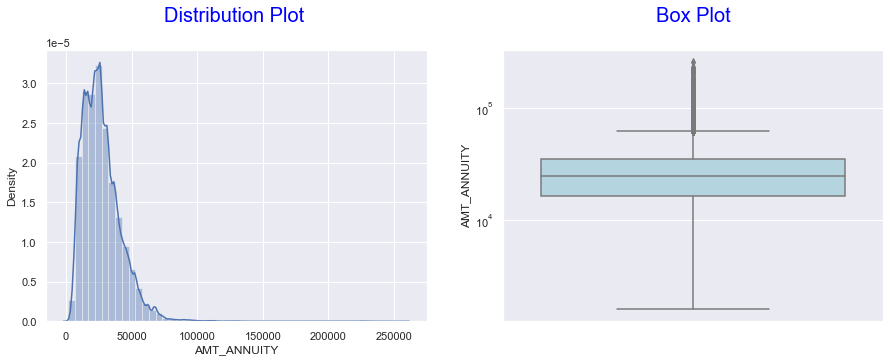

In [124]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
uni(df=target0,col='AMT_ANNUITY')

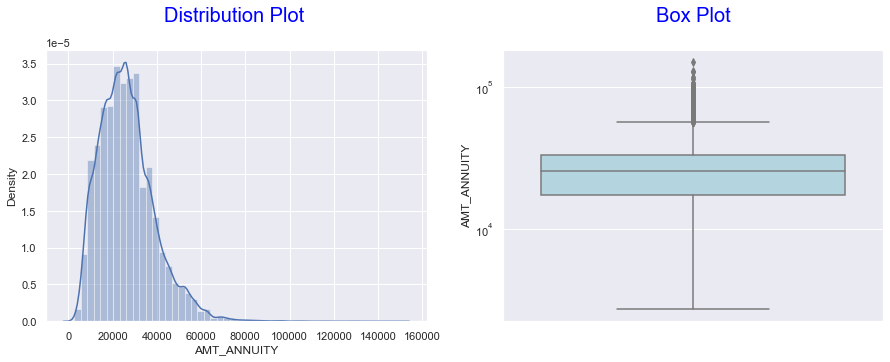

In [125]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
uni(df=target1,col='AMT_ANNUITY')

##### Inference: We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

### Credit Amount

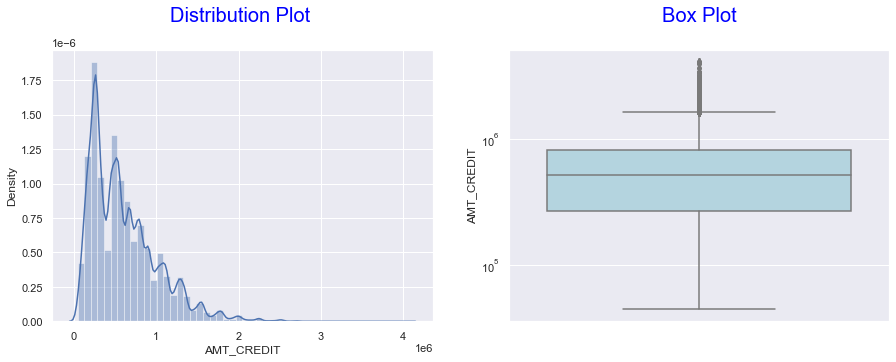

In [126]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Non-Payment Difficulties
uni(df=target0,col='AMT_CREDIT')

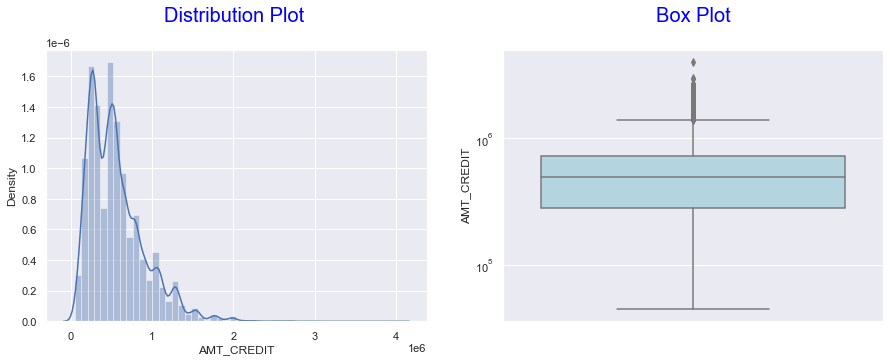

In [127]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Payment Difficulties
uni(df=target1,col='AMT_CREDIT')

#### Inference: We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile. The distribution curve does not appear to be normal or bell curve.

### Goods Price

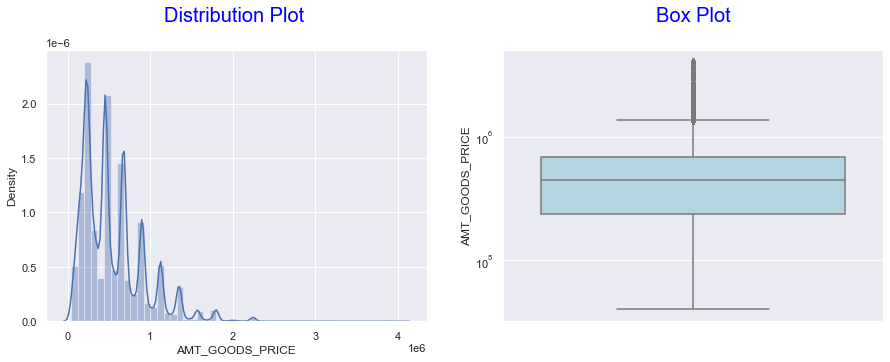

In [128]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan- Non-Payment Difficulties
uni(df=target0,col='AMT_GOODS_PRICE')


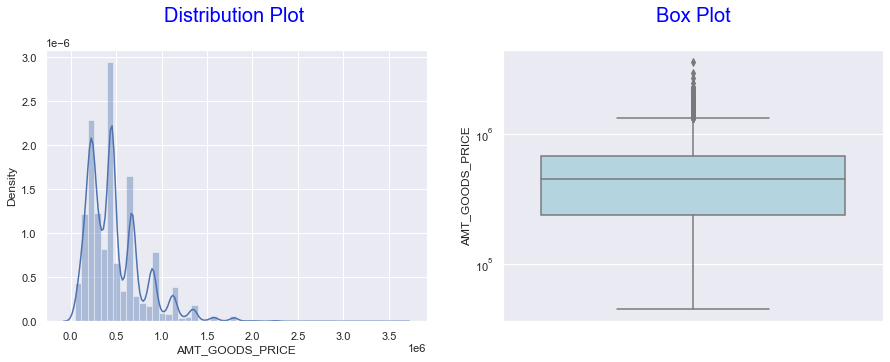

In [129]:
# Distribution and Box plot for 'AMT_GOODS_PRICE' for Loan-Payment Difficulties
uni(df=target1,col='AMT_GOODS_PRICE')


##### Inference: We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile

## Bivariate Analysis

### Bivariate Analysis of Categorical vs Numerical Variables

### Analysis - 1

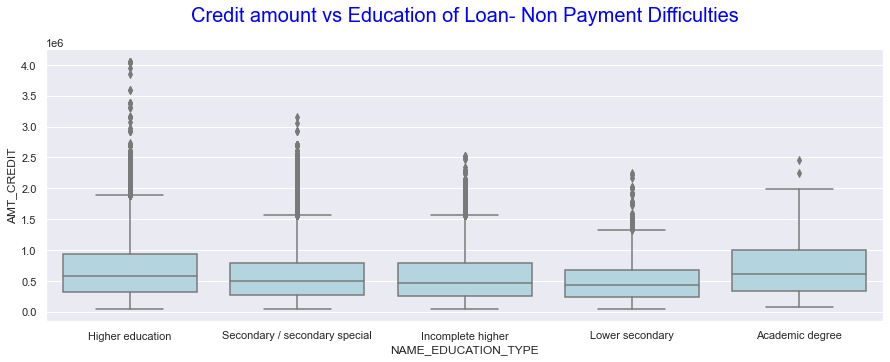

In [130]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize =[15,5])
fig = sns.boxplot(data =target0, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='lightblue')
plt.title("Credit amount vs Education of Loan- Non Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show()

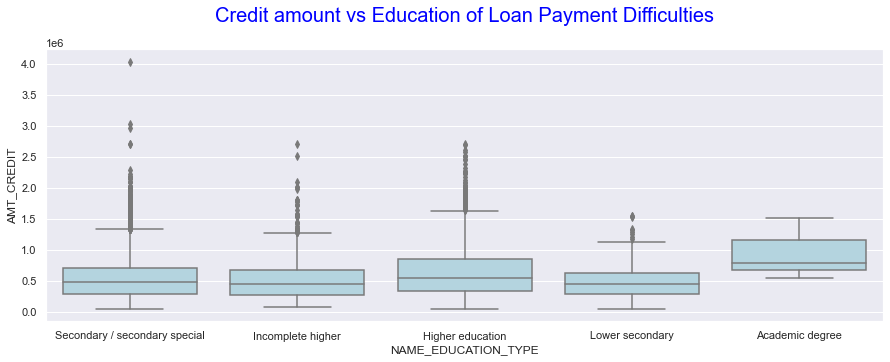

In [131]:
# 'NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' for Loan Payment Difficulties
plt.figure(figsize =[15,5])
fig = sns.boxplot(data = target1, x="NAME_EDUCATION_TYPE", y="AMT_CREDIT", color='lightblue',)              
plt.title("Credit amount vs Education of Loan Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show()

##### Inference: The graphs for Loan Payment Difficulties and Loan Non-Payment Difficulties apperas to be similar. Most of the outliers are from Education type 'Higher education' and 'Secondary'.

### Analysis - 2

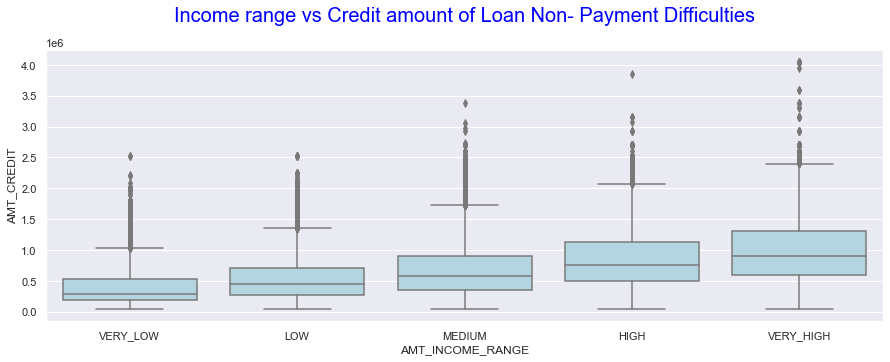

In [132]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan - Non Payment Difficulties
plt.figure(figsize =[15,5])
fig = sns.boxplot(data = target0, x="AMT_INCOME_RANGE", y="AMT_CREDIT", color='lightblue',)              
plt.title("Income range vs Credit amount of Loan Non- Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show()

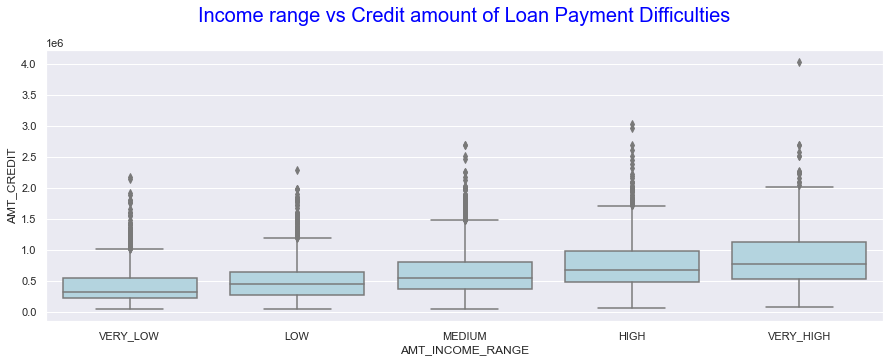

In [133]:
# 'AMT_INCOME_RANGE' vs 'AMT_CREDIT' for Loan Payment Difficulties
plt.figure(figsize =[15,5])
fig = sns.boxplot(data = target1, x="AMT_INCOME_RANGE", y="AMT_CREDIT", color='lightblue',)              
plt.title("Income range vs Credit amount of Loan Payment Difficulties\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
plt.show()

##### Inference: The graphs for Loan Payment Difficulties and Loan- Non Payment Difficulties appears to be similar. We observe that amount credit is gradually increasing from income range of very low to very high.

###  Bivariate Analysis of Categorical-Categorical

In [134]:
# Function for bivariate plots
def biplot(feature):
    plt.figure(figsize =[15,5])
    plt.subplot(1,2,1)
    app_data[feature].value_counts().plot.bar(color="blue")
    plt.title("Count of  " + feature,fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.xlabel(feature,fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.xticks(rotation =90)
    plt.subplot(1,2,2)
    perc =(target1[feature].value_counts()/app_data[feature].value_counts())
    perc.sort_values(ascending =False).plot.bar()
    plt.title("Percentage of loan payment difficulties \n with each category",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.xticks(rotation =90)
    plt.xlabel(feature,fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel("% 0f loan payment difficulties",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.show()

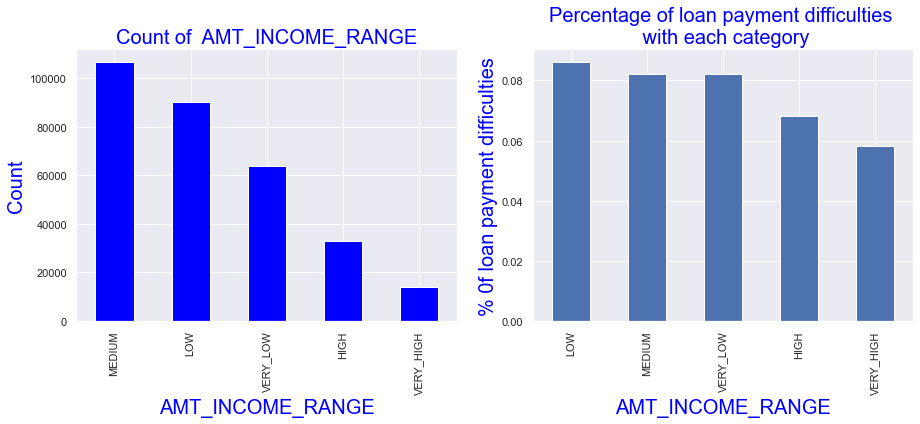

In [135]:
# Distribution of income range and the category with maximum Loan-Payment Difficulties
biplot("AMT_INCOME_RANGE")

##### Inference: From the plot above we can say that clients with 'LOW' Income range have maximum % of Loan-Payment Difficulties.

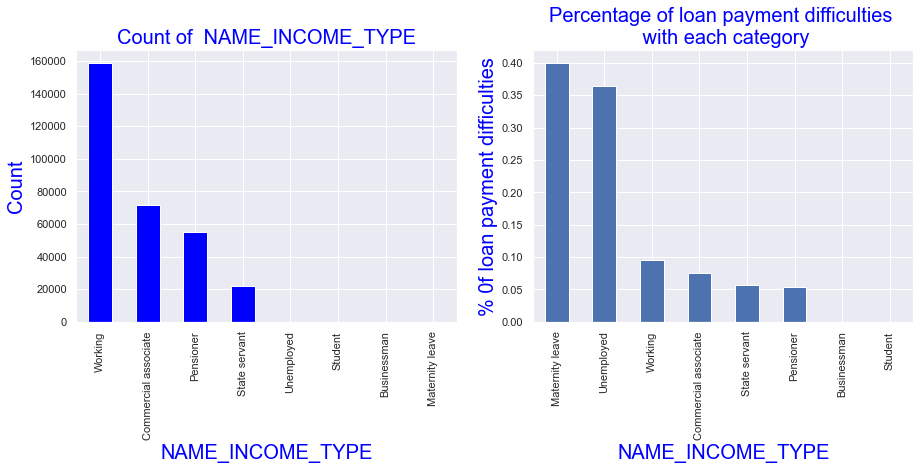

In [136]:
# Distribution of income range and the category with maximum Loan-Payment Difficulties
biplot('NAME_INCOME_TYPE')


##### Inference: From the plot above we can say that clients with 'Maternity leave' Income type have maximum % of Loan-Payment Difficulties.

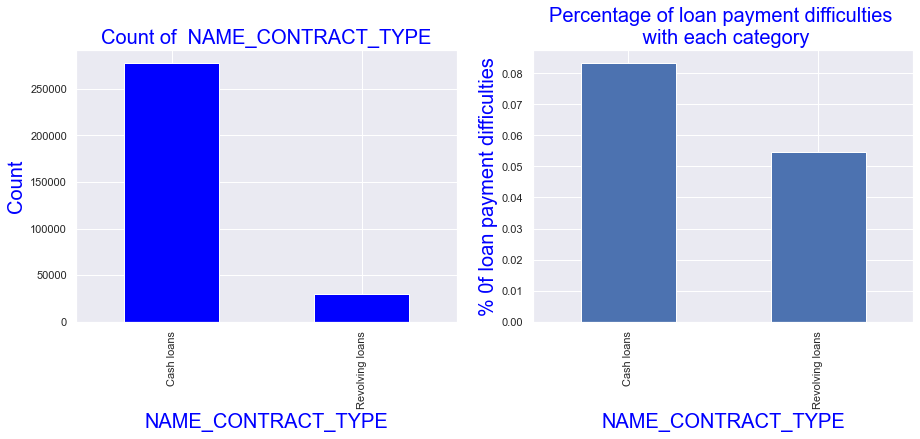

In [137]:
# Distribution of Contract Type and the category with maximum Loan-Payment Difficulties
biplot('NAME_CONTRACT_TYPE')

##### Inference: From the plot above we can say that clients with 'Cash loans' contract type have maximum % of Loan-Payemnt Difficulties.

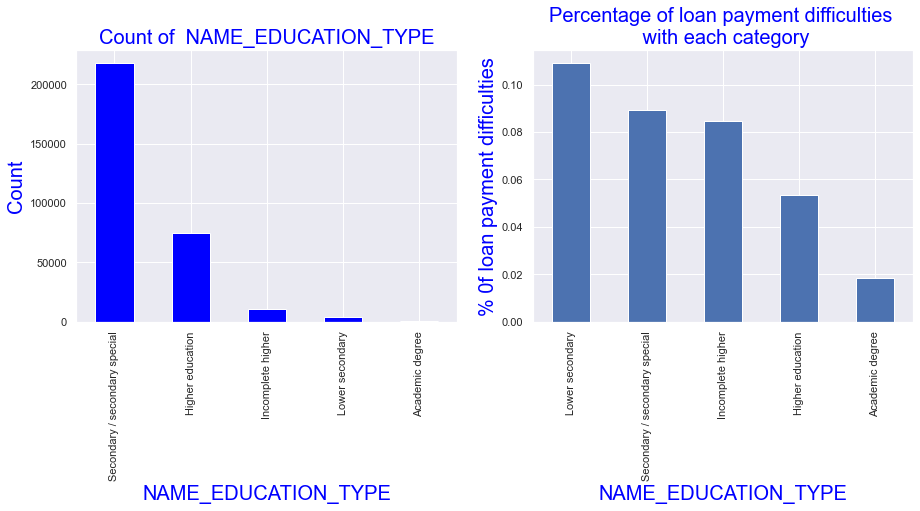

In [138]:
# Distribution of Education Type and the category with maximum Loan-Payment Difficulties
biplot('NAME_EDUCATION_TYPE')

##### Inference: From the plot above we can say that clients with 'Lower secondary' education type have maximum % of Loan-Payment Difficulties.

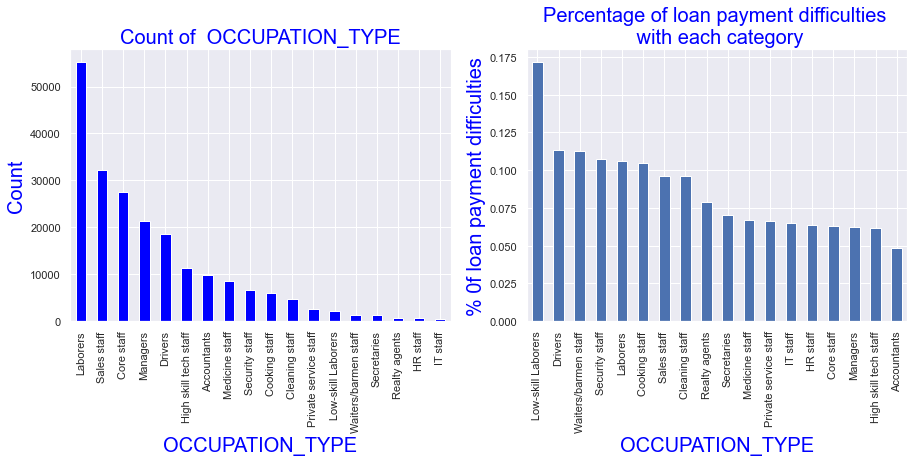

In [139]:
# Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties
biplot('OCCUPATION_TYPE')

#####  Inference: From the plot above we can say that clients with 'Lower skill Laborers' occupation type have maximum % of Loan-Payment Difficulties.

In [140]:
table= pd.pivot_table(app_data, values='TARGET', index=['CODE_GENDER','AMT_INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
table

NAME_EDUCATION_TYPE           Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_RANGE                                      
F           VERY_LOW                 0.000000          0.056068   
            LOW                      0.000000          0.049022   
            MEDIUM                   0.000000          0.050254   
            HIGH                     0.105263          0.041516   
            VERY_HIGH                0.076923          0.037289   
M           VERY_LOW                 0.000000          0.080411   
            LOW                      0.000000          0.073305   
            MEDIUM                   0.000000          0.070086   
            HIGH                     0.000000          0.055911   
            VERY_HIGH                0.000000          0.044080   

NAME_EDUCATION_TYPE           Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_RANGE                                       
F           VERY_LOW                   0.086399         0.080193   
            LOW                        0.080075         0.113889   
            MEDIUM                     0.078431         0.096983   
            HIGH                       0.074313         0.038961   
            VERY_HIGH                  0.082251         0.066667   
M           VERY_LOW                   0.123967         0.125000   
            LOW                        0.097778         0.142857   
            MEDIUM                     0.095130         0.150515   
            HIGH                       0.074627         0.081633   
            VERY_HIGH                  0.077586         0.064516   

NAME_EDUCATION_TYPE           Secondary / secondary special  
CODE_GENDER AMT_INCOME_RANGE                                 
F           VERY_LOW                               0.076778  
            LOW                                    0.079523  
            MEDIUM                                 0.075692  
            HIGH                                   0.070736  
            VERY_HIGH                              0.065930  
M           VERY_LOW                               0.118066  
            LOW                                    0.123693  
            MEDIUM                                 0.113466  
            HIGH                                   0.093484  
            VERY_HIGH                              0.089939

#### 1.From Female category Clients who have LOW income and LOWER SECONDARY education have maximum % of Loan-Payment Difficulties 


#### 2.From Male category Clients wo have MEDIUM income and LOWER SECONDARY education have maximum % of Loan-Payment Difficulties

## Bivariate Analysis of Numerical vs Numerical Variables

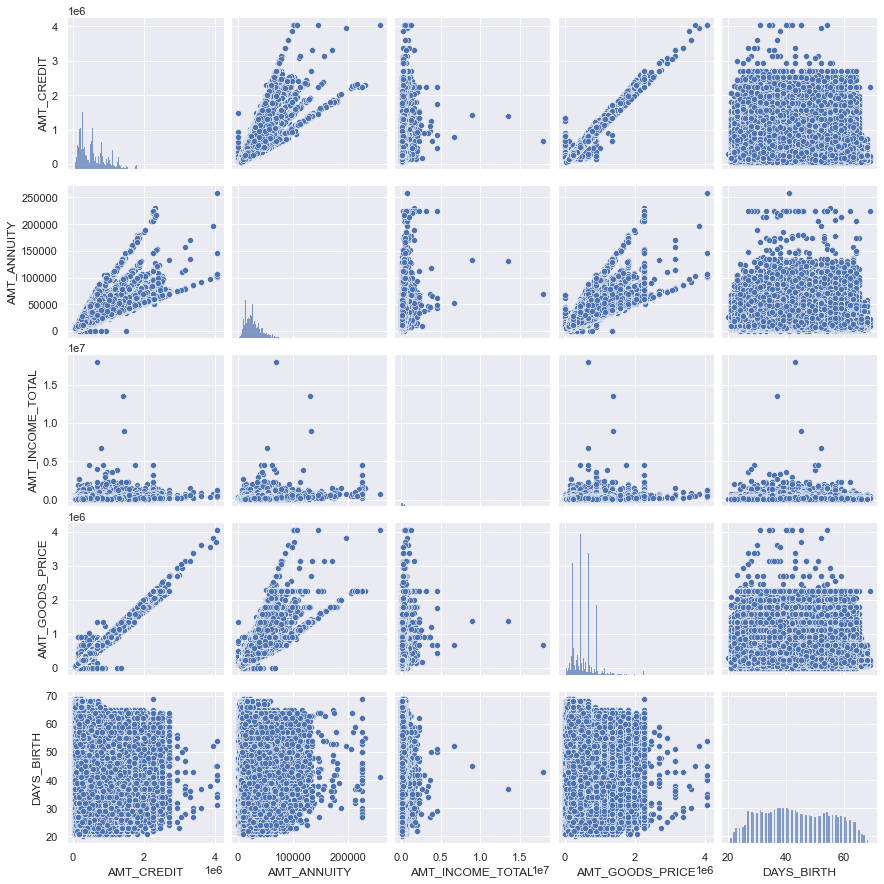

In [141]:
#Pairplot for Target 0 (Loan-Non Payment Difficulties)
pair = target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

##### Inference : From the above pair plots we can see that AMT_CREDIT and AMT_GOODS_PRICE has high correlation.

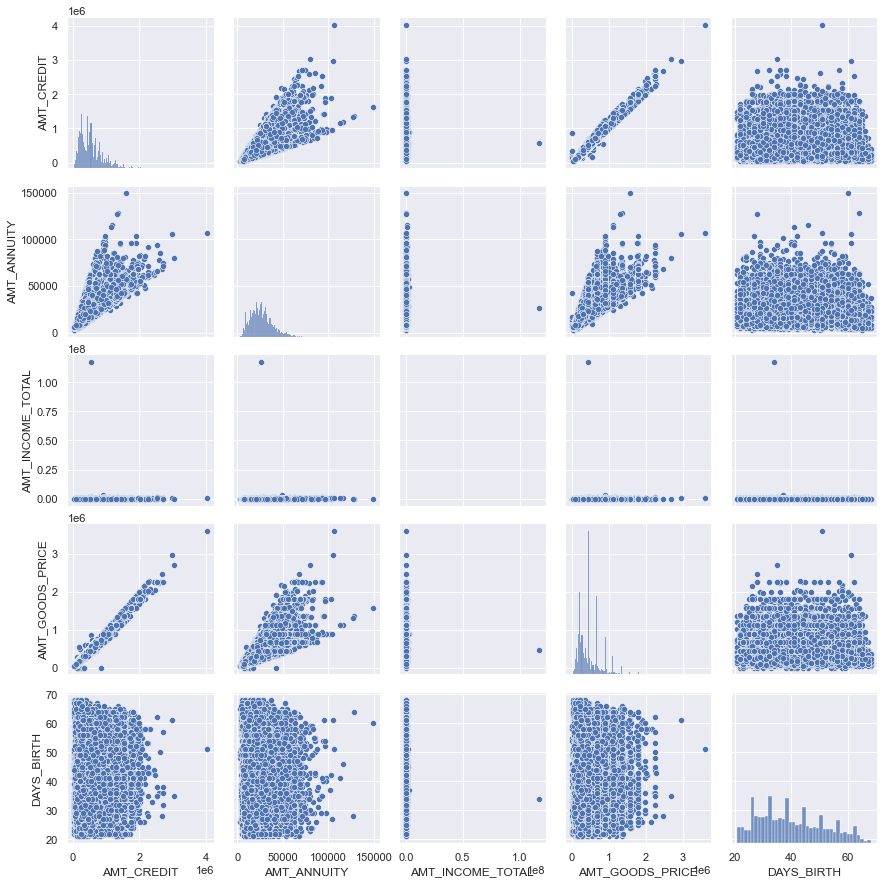

In [142]:
#Pairplot for Target 1 (Loan-Payment Difficulties)
pair = target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

##### Inferece: Here also from  the above pair plots we can see that AMT_CREDIT and AMT_GOODS_PRICE has high correlation.


### Heatmaps

In [143]:
# Correlation for Loan- Non Payment Difficulties
heat_np =target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH',
         'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
         'AMT_CREDIT',]].corr(method = 'pearson')
heat_np

AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_ANNUITY  \
AMT_GOODS_PRICE           1.000000          0.349462     0.776686   
AMT_INCOME_TOTAL          0.349462          1.000000     0.418953   
AMT_ANNUITY               0.776686          0.418953     1.000000   
DAYS_EMPLOYED            -0.068609         -0.140392    -0.104978   
DAYS_BIRTH                0.044552         -0.062494    -0.012254   
DAYS_REGISTRATION        -0.015916         -0.064937    -0.039436   
DAYS_ID_PUBLISH           0.003649         -0.022896    -0.014113   
AMT_CREDIT                0.987250          0.342799     0.771309   

                   DAYS_EMPLOYED  DAYS_BIRTH  DAYS_REGISTRATION  \
AMT_GOODS_PRICE        -0.068609    0.044552          -0.015916   
AMT_INCOME_TOTAL       -0.140392   -0.062494          -0.064937   
AMT_ANNUITY            -0.104978   -0.012254          -0.039436   
DAYS_EMPLOYED           1.000000    0.626028           0.214511   
DAYS_BIRTH              0.626028    1.000000           0.333025   
DAYS_REGISTRATION       0.214511    0.333025           1.000000   
DAYS_ID_PUBLISH         0.276663    0.270804           0.100236   
AMT_CREDIT             -0.070104    0.047366          -0.013477   

                   DAYS_ID_PUBLISH  AMT_CREDIT  
AMT_GOODS_PRICE           0.003649    0.987250  
AMT_INCOME_TOTAL         -0.022896    0.342799  
AMT_ANNUITY              -0.014113    0.771309  
DAYS_EMPLOYED             0.276663   -0.070104  
DAYS_BIRTH                0.270804    0.047366  
DAYS_REGISTRATION         0.100236   -0.013477  
DAYS_ID_PUBLISH           1.000000    0.001464  
AMT_CREDIT                0.001464    1.000000

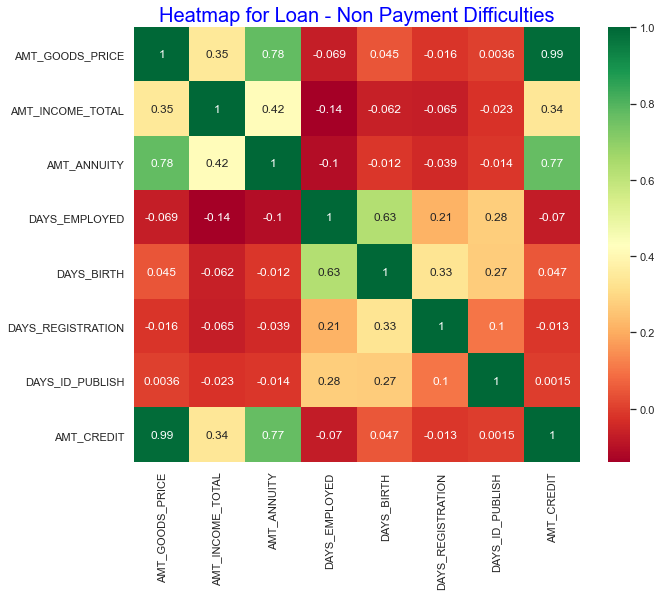

In [144]:
# Heatmap for Loan- Non Payment Difficulties
plt.figure(figsize =[10,8])
plt.title("Heatmap for Loan - Non Payment Difficulties",{"fontsize":20,"fontweight":5,"color":"blue"})
sns.heatmap(heat_np,annot =True,cmap ="RdYlGn")
plt.show()

In [145]:
# Correlation for Loan Payment Difficulties
heat_p =target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
heat_p

AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_ANNUITY  \
AMT_GOODS_PRICE           1.000000          0.037583     0.752699   
AMT_INCOME_TOTAL          0.037583          1.000000     0.046421   
AMT_ANNUITY               0.752699          0.046421     1.000000   
DAYS_EMPLOYED             0.006642         -0.014977    -0.081207   
DAYS_BIRTH                0.135603         -0.003154     0.014028   
DAYS_REGISTRATION         0.025679         -0.000158    -0.034279   
DAYS_ID_PUBLISH           0.056086          0.004215     0.016767   
AMT_CREDIT                0.983103          0.038131     0.752195   

                   DAYS_EMPLOYED  DAYS_BIRTH  DAYS_REGISTRATION  \
AMT_GOODS_PRICE         0.006642    0.135603           0.025679   
AMT_INCOME_TOTAL       -0.014977   -0.003154          -0.000158   
AMT_ANNUITY            -0.081207    0.014028          -0.034279   
DAYS_EMPLOYED           1.000000    0.582441           0.192455   
DAYS_BIRTH              0.582441    1.000000           0.289116   
DAYS_REGISTRATION       0.192455    0.289116           1.000000   
DAYS_ID_PUBLISH         0.229090    0.252256           0.096833   
AMT_CREDIT              0.001930    0.135070           0.025854   

                   DAYS_ID_PUBLISH  AMT_CREDIT  
AMT_GOODS_PRICE           0.056086    0.983103  
AMT_INCOME_TOTAL          0.004215    0.038131  
AMT_ANNUITY               0.016767    0.752195  
DAYS_EMPLOYED             0.229090    0.001930  
DAYS_BIRTH                0.252256    0.135070  
DAYS_REGISTRATION         0.096833    0.025854  
DAYS_ID_PUBLISH           1.000000    0.052329  
AMT_CREDIT                0.052329    1.000000

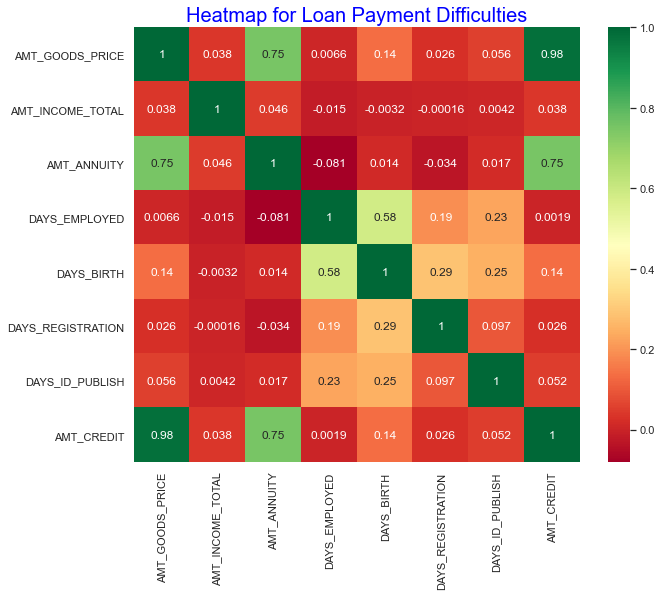

In [146]:
# Heatmap for Loan-Payment Difficulties
plt.figure(figsize =[10,8])
plt.title("Heatmap for Loan Payment Difficulties",{"fontsize":20,"fontweight":5,"color":"blue"})
sns.heatmap(heat_p,annot =True,cmap ="RdYlGn")
plt.show()

#### Inference: We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income.

## 7.Top 10 Correlation for client with non payment and payment difficulties

In [147]:
#top 10 correlation for clients with non payment difficulties
corr=target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr

AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_ANNUITY  \
AMT_GOODS_PRICE                NaN          0.349462     0.776686   
AMT_INCOME_TOTAL               NaN               NaN     0.418953   
AMT_ANNUITY                    NaN               NaN          NaN   
DAYS_EMPLOYED                  NaN               NaN          NaN   
DAYS_BIRTH                     NaN               NaN          NaN   
DAYS_REGISTRATION              NaN               NaN          NaN   
DAYS_ID_PUBLISH                NaN               NaN          NaN   
AMT_CREDIT                     NaN               NaN          NaN   

                   DAYS_EMPLOYED  DAYS_BIRTH  DAYS_REGISTRATION  \
AMT_GOODS_PRICE        -0.068609    0.044552          -0.015916   
AMT_INCOME_TOTAL       -0.140392   -0.062494          -0.064937   
AMT_ANNUITY            -0.104978   -0.012254          -0.039436   
DAYS_EMPLOYED                NaN    0.626028           0.214511   
DAYS_BIRTH                   NaN         NaN           0.333025   
DAYS_REGISTRATION            NaN         NaN                NaN   
DAYS_ID_PUBLISH              NaN         NaN                NaN   
AMT_CREDIT                   NaN         NaN                NaN   

                   DAYS_ID_PUBLISH  AMT_CREDIT  
AMT_GOODS_PRICE           0.003649    0.987250  
AMT_INCOME_TOTAL         -0.022896    0.342799  
AMT_ANNUITY              -0.014113    0.771309  
DAYS_EMPLOYED             0.276663   -0.070104  
DAYS_BIRTH                0.270804    0.047366  
DAYS_REGISTRATION         0.100236   -0.013477  
DAYS_ID_PUBLISH                NaN    0.001464  
AMT_CREDIT                     NaN         NaN

In [148]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [149]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1              VAR2  CORRELATION  CORR_ABS
56         AMT_CREDIT   AMT_GOODS_PRICE     0.987250  0.987250
16        AMT_ANNUITY   AMT_GOODS_PRICE     0.776686  0.776686
58         AMT_CREDIT       AMT_ANNUITY     0.771309  0.771309
35         DAYS_BIRTH     DAYS_EMPLOYED     0.626028  0.626028
17        AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953  0.418953
8    AMT_INCOME_TOTAL   AMT_GOODS_PRICE     0.349462  0.349462
57         AMT_CREDIT  AMT_INCOME_TOTAL     0.342799  0.342799
44  DAYS_REGISTRATION        DAYS_BIRTH     0.333025  0.333025
51    DAYS_ID_PUBLISH     DAYS_EMPLOYED     0.276663  0.276663
52    DAYS_ID_PUBLISH        DAYS_BIRTH     0.270804  0.270804

##### The above dataframe shows top 10 correlation for clients with non payment difficulties

In [150]:
#top 10 correlation for clients with payment difficulties
corr=target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED',
  'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
  'AMT_CREDIT']].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr

AMT_GOODS_PRICE  AMT_INCOME_TOTAL  AMT_ANNUITY  \
AMT_GOODS_PRICE                NaN          0.037583     0.752699   
AMT_INCOME_TOTAL               NaN               NaN     0.046421   
AMT_ANNUITY                    NaN               NaN          NaN   
DAYS_EMPLOYED                  NaN               NaN          NaN   
DAYS_BIRTH                     NaN               NaN          NaN   
DAYS_REGISTRATION              NaN               NaN          NaN   
DAYS_ID_PUBLISH                NaN               NaN          NaN   
AMT_CREDIT                     NaN               NaN          NaN   

                   DAYS_EMPLOYED  DAYS_BIRTH  DAYS_REGISTRATION  \
AMT_GOODS_PRICE         0.006642    0.135603           0.025679   
AMT_INCOME_TOTAL       -0.014977   -0.003154          -0.000158   
AMT_ANNUITY            -0.081207    0.014028          -0.034279   
DAYS_EMPLOYED                NaN    0.582441           0.192455   
DAYS_BIRTH                   NaN         NaN           0.289116   
DAYS_REGISTRATION            NaN         NaN                NaN   
DAYS_ID_PUBLISH              NaN         NaN                NaN   
AMT_CREDIT                   NaN         NaN                NaN   

                   DAYS_ID_PUBLISH  AMT_CREDIT  
AMT_GOODS_PRICE           0.056086    0.983103  
AMT_INCOME_TOTAL          0.004215    0.038131  
AMT_ANNUITY               0.016767    0.752195  
DAYS_EMPLOYED             0.229090    0.001930  
DAYS_BIRTH                0.252256    0.135070  
DAYS_REGISTRATION         0.096833    0.025854  
DAYS_ID_PUBLISH                NaN    0.052329  
AMT_CREDIT                     NaN         NaN

In [151]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()

In [152]:
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

VAR1             VAR2  CORRELATION  CORR_ABS
56         AMT_CREDIT  AMT_GOODS_PRICE     0.983103  0.983103
16        AMT_ANNUITY  AMT_GOODS_PRICE     0.752699  0.752699
58         AMT_CREDIT      AMT_ANNUITY     0.752195  0.752195
35         DAYS_BIRTH    DAYS_EMPLOYED     0.582441  0.582441
44  DAYS_REGISTRATION       DAYS_BIRTH     0.289116  0.289116
52    DAYS_ID_PUBLISH       DAYS_BIRTH     0.252256  0.252256
51    DAYS_ID_PUBLISH    DAYS_EMPLOYED     0.229090  0.229090
43  DAYS_REGISTRATION    DAYS_EMPLOYED     0.192455  0.192455
32         DAYS_BIRTH  AMT_GOODS_PRICE     0.135603  0.135603
60         AMT_CREDIT       DAYS_BIRTH     0.135070  0.135070

##### The above dataframe shows top 10 correlation for clients with  payment difficulties

## 8.Data Analysis on Previous Application data

### Data loading and cleaning

In [153]:
# loading the previous_application.csv
app_data_prev= pd.read_csv('previous_application.csv')
app_data_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [154]:
app_data_prev.shape

(1670214, 37)

In [155]:
app_data_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [156]:
app_data_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [157]:
# viewing the columns starting with "DAYS"
filter_col = [col for col in app_data_prev if col.startswith('DAYS')]
filter_col

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [158]:
# Checking the values present in columns starting with 'DAYS'
print(app_data_prev['DAYS_DECISION'].unique())
print(app_data_prev['DAYS_FIRST_DRAWING'].unique())
print(app_data_prev['DAYS_FIRST_DUE'].unique())
print(app_data_prev['DAYS_LAST_DUE_1ST_VERSION'].unique())
print(app_data_prev['DAYS_LAST_DUE'].unique())
print(app_data_prev['DAYS_TERMINATION'].unique())

[  -73  -164  -301 ... -1967 -2389    -1]
[ 3.65243e+05          nan -2.77000e+02 ... -1.61100e+03 -1.77000e+03
 -1.87900e+03]
[  -42.  -134.  -271. ... -2842. -1774. -2892.]
[ 300.  916.   59. ... 1878. 2016. 1760.]
[-4.20000e+01  3.65243e+05 -1.82000e+02 ... -2.86700e+03 -2.86600e+03
 -2.83300e+03]
[-3.70000e+01  3.65243e+05 -1.77000e+02 ... -2.82800e+03 -2.87000e+03
 -2.81500e+03]


In [159]:
# chnaging the negative values in the columns whose name start with DAYS to positive values.
app_data_prev[filter_col]= abs(app_data_prev[filter_col])

In [160]:
app_data_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0           73.0  Cash through the bank                XAP              NaN   
1          164.0                    XNA                XAP    Unaccompanied   
2          301.0  Cash through the bank                XAP  Spouse, partner   
3          512.0  Cash through the bank                XAP              NaN   
4          781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [161]:
# XNA and XAP are replaced by NaN
app_data_prev=app_data_prev.replace('XNA', np.NaN)
app_data_prev=app_data_prev.replace('XAP', np.NaN)

In [162]:
app_data_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    NaN             Approved   
1                       NaN                    NaN             Approved   
2                       NaN                    NaN             Approved   
3                       NaN                    NaN             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0           73.0  Cash through the bank                NaN              NaN   
1          164.0                    NaN                NaN    Unaccompanied   
2          301.0  Cash through the bank                NaN  Spouse, partner   
3          512.0  Cash through the bank                NaN              NaN   
4          781.0  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               NaN   
1         Repeater                 NaN           Cash            x-sell   
2         Repeater                 NaN           Cash            x-sell   
3         Repeater                 NaN           Cash            x-sell   
4         Repeater                 NaN           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  NaN   
2  Credit and cash offices                -1                  NaN   
3  Credit and cash offices                -1                  NaN   
4  Credit and cash offices                -1                  NaN   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

###  Some Univariate Analysis on previous application data

### Contract Status

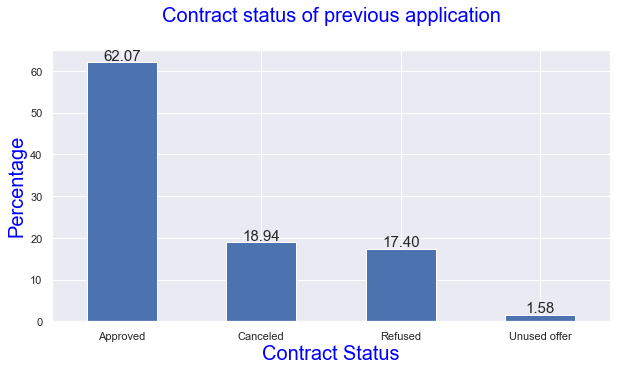

In [163]:
# Contract status of previous application
plt.figure(figsize = [10,5])
plots = (app_data_prev["NAME_CONTRACT_STATUS"].value_counts(normalize =True)*100).plot.bar()
plt.title("Contract status of previous application\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Contract Status",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

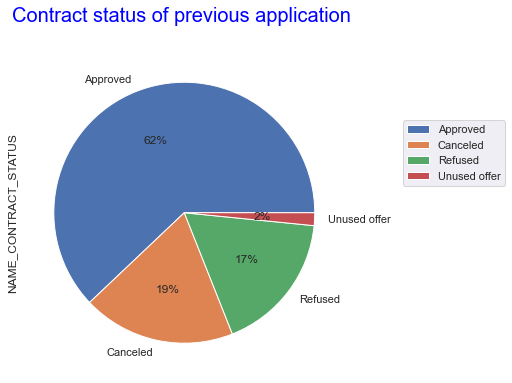

In [164]:
plt.figure(figsize = [15,6])
app_data_prev["NAME_CONTRACT_STATUS"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Contract status of previous application \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(1.5,0.8), loc="upper right")
plt.show()

##### Inference: We can observe that majority of loans are approved and very less percentage of loans are unused offer

### Day of the week

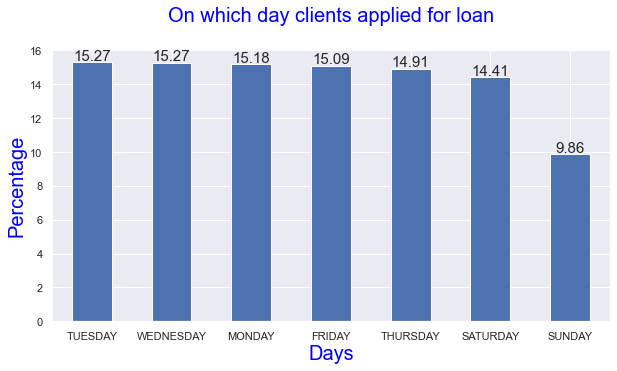

In [165]:
# On which day clients applied for loan in previous data and their counts
plt.figure(figsize = [10,5])
plots = (app_data_prev["WEEKDAY_APPR_PROCESS_START"].value_counts(normalize =True)*100).plot.bar()
plt.title("On which day clients applied for loan\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Days",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

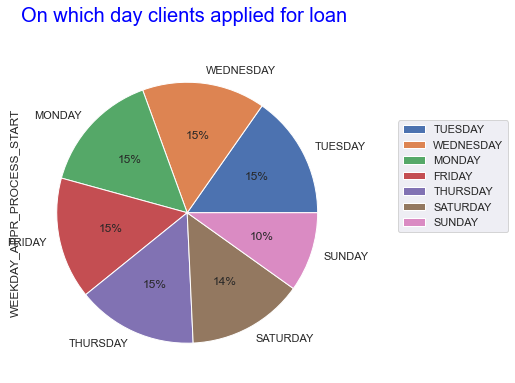

In [166]:
plt.figure(figsize = [15,6])
app_data_prev["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("On which day clients applied for loan \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(1.5,0.8), loc="upper right")
plt.show()

##### Inference: We observe that there are less number of applicants that come in the weekends.

### Payment Method

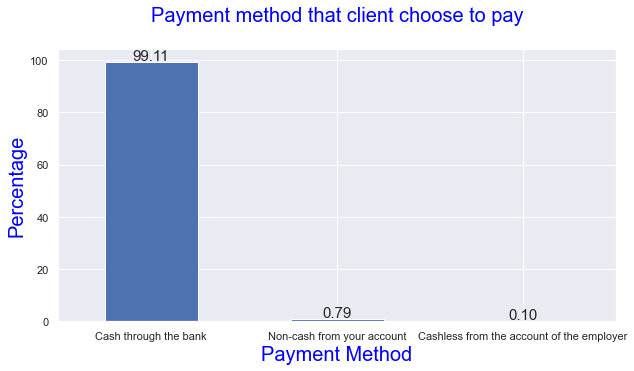

In [167]:
# Payment method that client choose to pay for the previous application
plt.figure(figsize = [10,5])
plots = (app_data_prev["NAME_PAYMENT_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Payment method that client choose to pay\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Payment Method",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

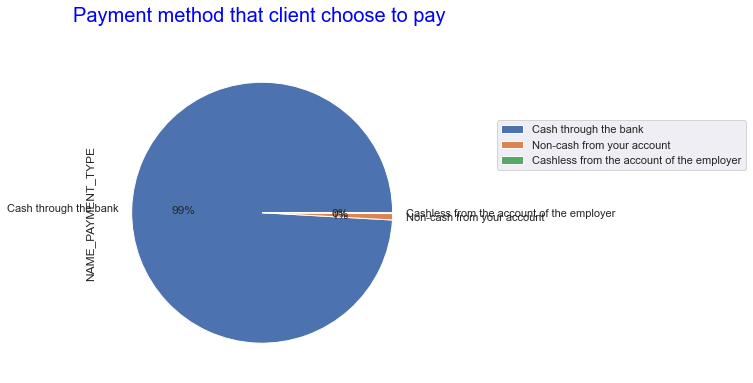

In [168]:
plt.figure(figsize = [15,6])
app_data_prev["NAME_PAYMENT_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Payment method that client choose to pay \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: 99% of the clients chose to pay cash through bank.

### Reasons of previous application rejection

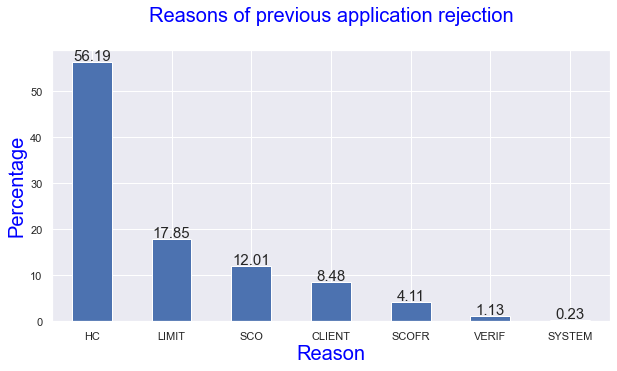

In [169]:
# Reasons of previous application rejection
plt.figure(figsize = [10,5])
plots = (app_data_prev["CODE_REJECT_REASON"].value_counts(normalize =True)*100).plot.bar()
plt.title("Reasons of previous application rejection\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Reason",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

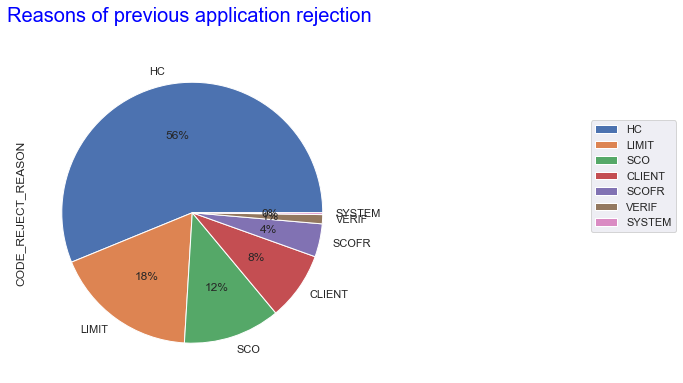

In [170]:
plt.figure(figsize = [15,6])
app_data_prev["CODE_REJECT_REASON"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Reasons of previous application rejection \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe that HC is the reason majority of applications got rejetced.

### Client Type

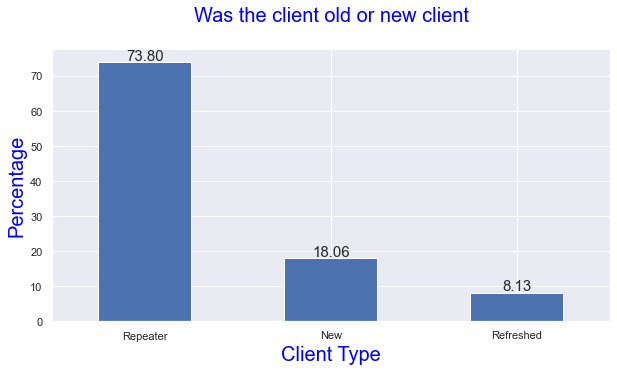

In [171]:
# Was the client old or new client when applying for the previous application
plt.figure(figsize = [10,5])
plots = (app_data_prev["NAME_CLIENT_TYPE"].value_counts(normalize =True)*100).plot.bar()
plt.title("Was the client old or new client\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Client Type",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

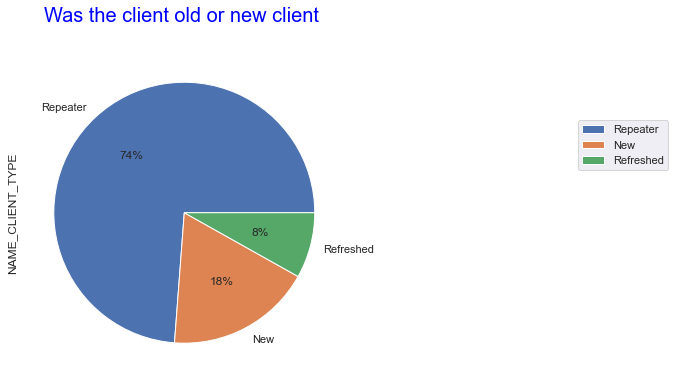

In [172]:
plt.figure(figsize = [15,6])
app_data_prev["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Was the client old or new client \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We obeserve that majority of the clients are repeters.

### Was the previous application for CASH, POS, CAR, CARDS

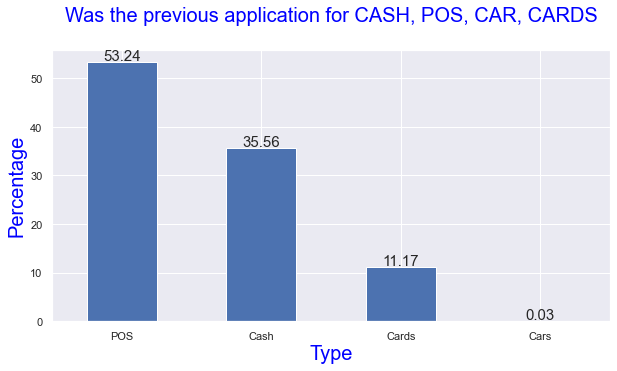

In [173]:
# Was the previous application for CASH, POS, CAR, CARDS
plt.figure(figsize = [10,5])
plots = (app_data_prev["NAME_PORTFOLIO"].value_counts(normalize =True)*100).plot.bar()
plt.title("Was the previous application for CASH, POS, CAR, CARDS\n",fontsize = 20,color = "blue")
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')
plt.xlabel("Type",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.show()

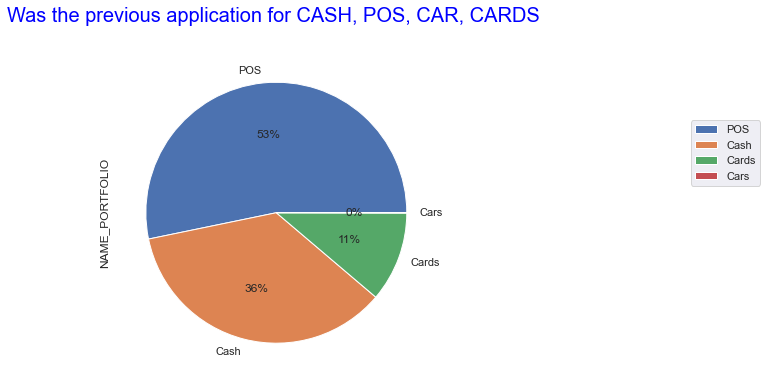

In [174]:
plt.figure(figsize = [15,6])
app_data_prev["NAME_PORTFOLIO"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Was the previous application for CASH, POS, CAR, CARDS \n",fontsize = 20,color = "blue")
plt.legend(bbox_to_anchor=(2,0.8), loc="upper right")
plt.show()

##### Inference: We observe that majority of previous application is for POS and a good amount of it is for cash.

### Type of goods

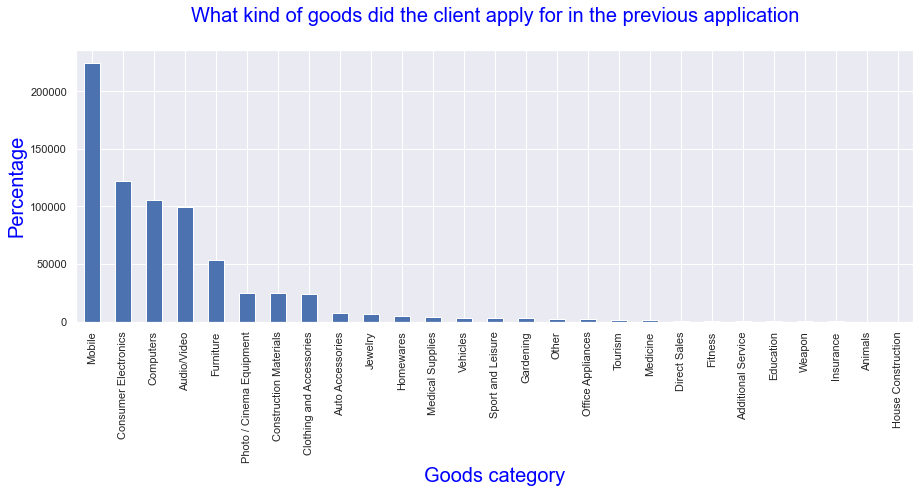

In [175]:
# What kind of goods did the client apply for in the previous application
plt.figure(figsize = [15,5])
plots = app_data_prev["NAME_GOODS_CATEGORY"].value_counts().plot.bar()
plt.title("What kind of goods did the client apply for in the previous application\n",fontsize = 20,color = "blue")
plt.xlabel("Goods category",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 90)
plt.show()

##### Inference: We observe that the majority of loans are for mobiles, consumer electronics, computers and furnitures.

## Univariate analysis of numerical columns

### Function for univariate plots

In [176]:
# Function for univariate plots
def uni(df,col):
    plt.figure(figsize =[15,5])
    plt.subplot(1,2,1)
    sns.set(style="darkgrid")
    sns.distplot(df[~df[col].isnull()][col])
    plt.title("Distribution Plot \n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.subplot(1,2,2)
    sns.boxplot(data = df,y= col ,color ="lightblue" )
    plt.title("Box Plot\n",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    plt.yscale('log')
    plt.show()

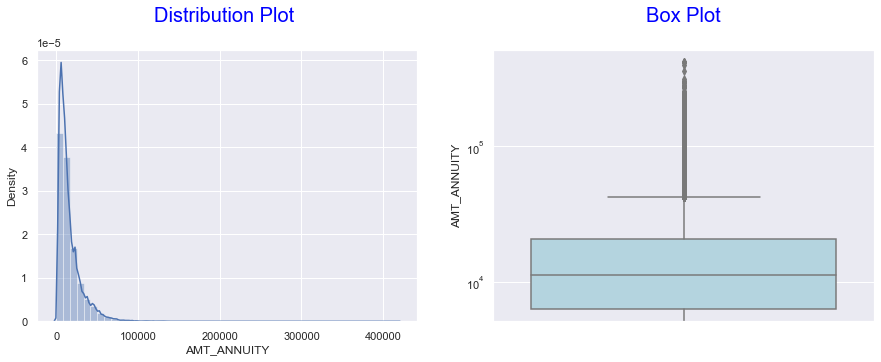

In [177]:
# For AMT_ANNUITY 
uni(df=app_data_prev,col='AMT_ANNUITY')

##### Inference: We observe that there are some outliers and the curve is not normal or a bell curve

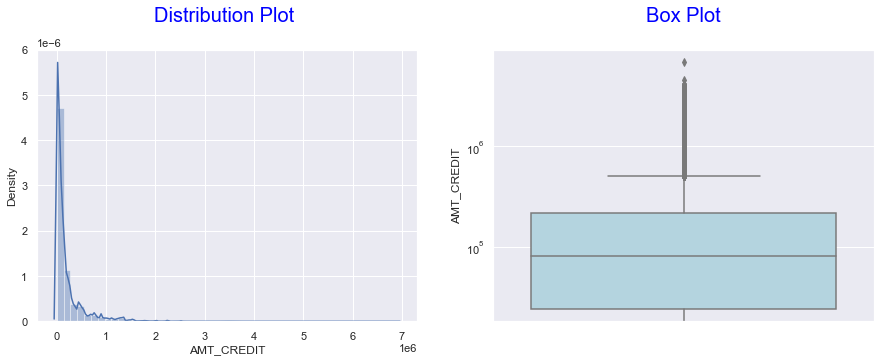

In [178]:
# For AMT_CREDIT
uni(df=app_data_prev,col='AMT_CREDIT')

##### Inference: We observe that there are some outliers and the curve is not normal or a bell curve



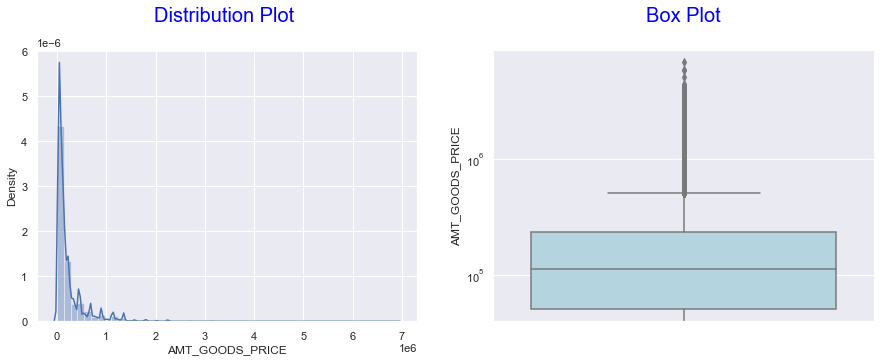

In [179]:
#For AMT_GOODS_PRICE 
uni(df=app_data_prev,col='AMT_GOODS_PRICE')

##### Inference: We observe that there are some outliers and the curve is not normal or a bell curve

## Bivariate analysis after combining previous and current data

In [180]:
# Taking SK_ID_CURR and TARGET column from application data for further analysis
app_data_new = app_data[['SK_ID_CURR','TARGET']]

In [181]:
app_data_new

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

In [182]:
# merging application and previous application data on 'SK_ID_CURR'
app_data_merge = app_data_new.merge(app_data_prev,on='SK_ID_CURR', how='inner')
app_data_merge.shape

(1413701, 38)

### Bivariate Analysis of Categorical-Categorical

In [183]:
# Dividing the original dataset into two different datasets depending upon the target value
target0_n = app_data_merge.loc[app_data_merge.TARGET == 0]
target1_n = app_data_merge.loc[app_data_merge.TARGET == 1]

In [184]:
# Function for bivariate plots
def biplot(feature):
    plt.figure(figsize =[15,5])
    plt.subplot(1,2,1)
    app_data_merge[feature].value_counts().plot.bar(color="blue")
    plt.title("Count of  " + feature,fontdict={'fontsize':20,'fontweight':5,'color':'blue'})
    
    
    plt.xlabel(feature,fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel("Count",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    
    
    plt.xticks(rotation =90)
    plt.subplot(1,2,2)
    perc =(target1_n[feature].value_counts()/app_data_merge[feature].value_counts())
    perc.sort_values(ascending =False).plot.bar()
    plt.title("Percentage of loan payment difficulties \n with each category",fontdict={'fontsize':20,'fontweight':5,'color':'blue'})    
        
    plt.xlabel(feature,fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    plt.ylabel("% 0f loan payment difficulties",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
    
    plt.xticks(rotation =90)
    plt.show()

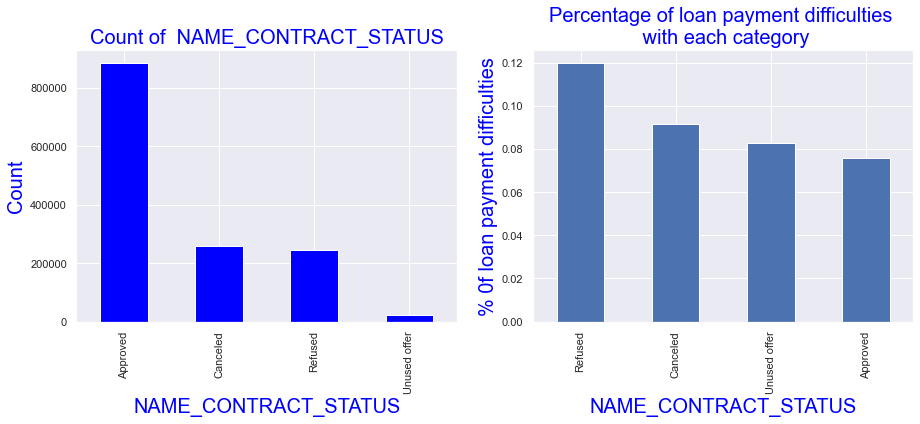

In [185]:
# Distribution of Contract Status and its category with maximum % of Loan-Payment Difficulties
biplot('NAME_CONTRACT_STATUS')

##### Inference: From the first graph it can be seen that most of the contracts from previous application have been Approved

It can be clearly seen from the second graph that the

'Refused' contracts from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
'Approved' contracts from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application.

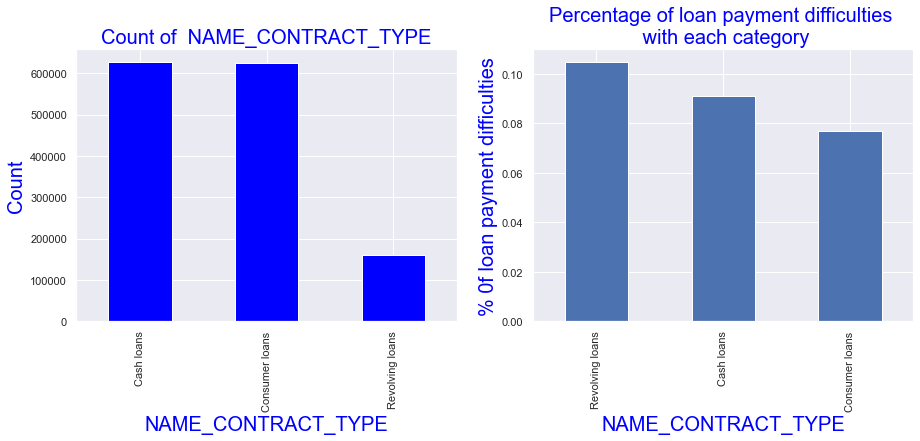

In [186]:
# Distribution of Contract Status and its category with maximum % of Loan-Payment Difficulties 
biplot('NAME_CONTRACT_TYPE')

##### Inference: From the first graph it can be seen that most of the contract type from previous application was 'Cash loans'

It can be clearly seen from the second graph that the

'Revolving Loans' contracts from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
'Consumer loans' contracts from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application.

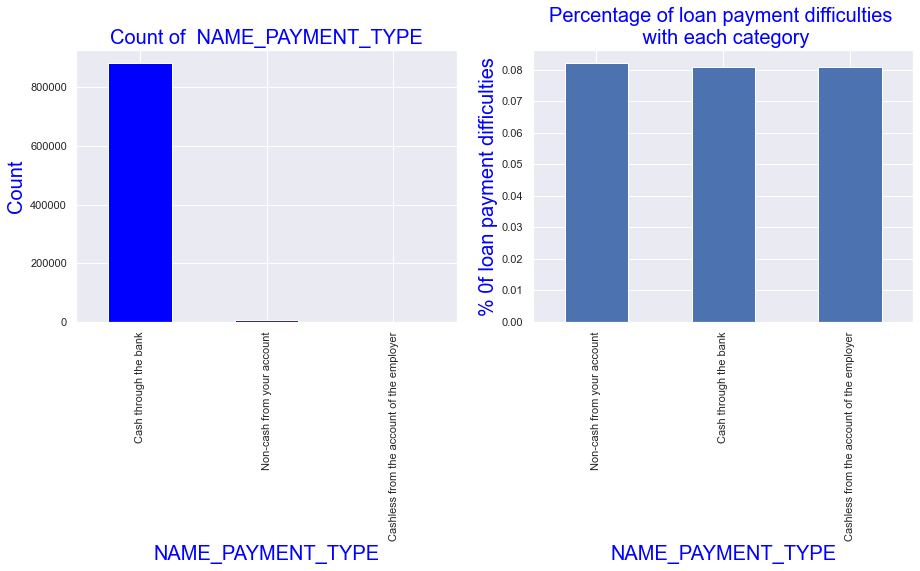

In [187]:
# Distribution of Payment Type and its category with maximum % of Loan-Payment Difficulties
biplot('NAME_PAYMENT_TYPE')

##### Inference: From the first graph it can be seen that most of the payment type from previous application was 'Cash through bank'

It can be clearly seen from the second graph that all three types of payments from the previous application have almost same % of Loan-Payment Difficulties from current application

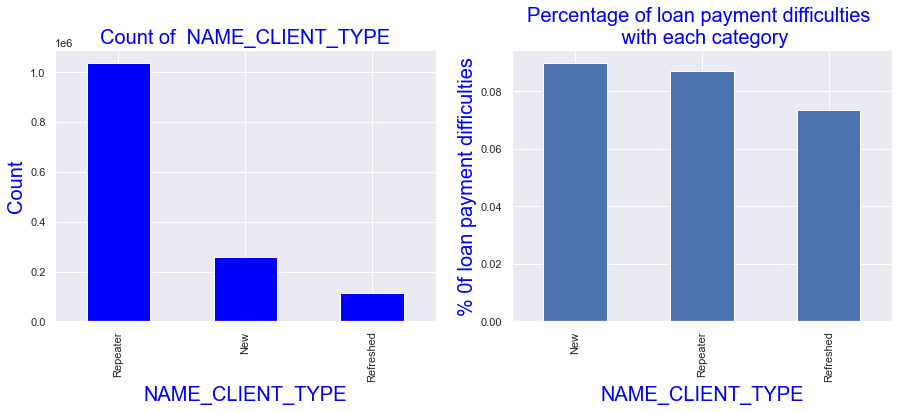

In [188]:
# Distribution of Client Type and its category with maximum % of Loan-Payment Difficulties 
biplot('NAME_CLIENT_TYPE')

##### Inference: From the first graph it can be seen that most of the clients from previous application are 'Repeater'

It can be clearly seen from the second graph that the

'New' clients from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.
'Refreshed' clients from previous application are the ones who have minimum % of Loan-Payment Difficulties from current application.

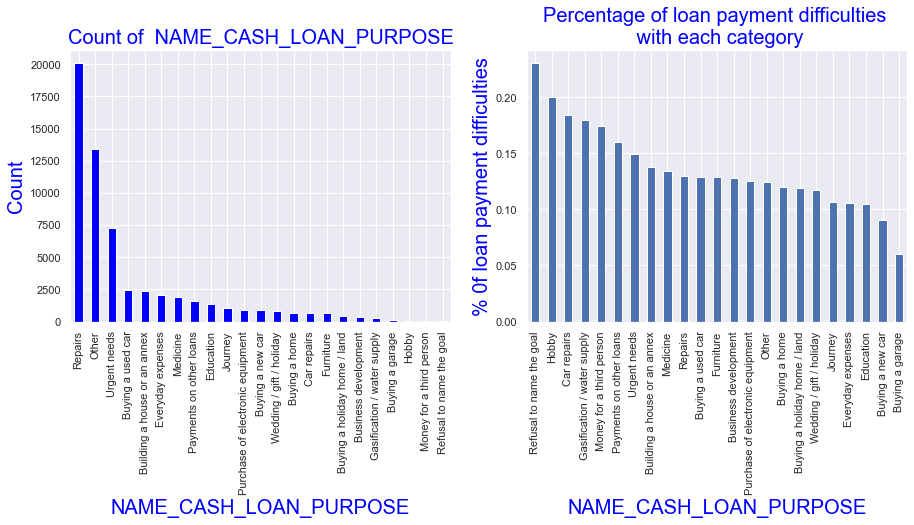

In [189]:
# Distribution of Cash Loan Purpose and its category with maximum % of Loan-Payment Difficulties 
biplot('NAME_CASH_LOAN_PURPOSE')

##### Inference: From the first graph it can be seen that purpose of cash loan from previous data was maximum for 'Repairs'

It can be clearly seen from the second graph that the

'Refusal to name the goal' for cash loan from previous application are the ones who have maximum % of Loan-Payment Difficulties from current application.

### % of Loan Payment Difficulties for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE

In [190]:
table = pd.pivot_table(app_data_merge, values='TARGET', index=['NAME_CONTRACT_STATUS'],columns=['NAME_CLIENT_TYPE'], aggfunc=np.mean)
table

NAME_CLIENT_TYPE           New  Refreshed  Repeater
NAME_CONTRACT_STATUS                               
Approved              0.088216   0.065158  0.072144
Canceled              0.145205   0.081098  0.091767
Refused               0.110940   0.117412  0.120596
Unused offer          0.089448   0.074324  0.083338

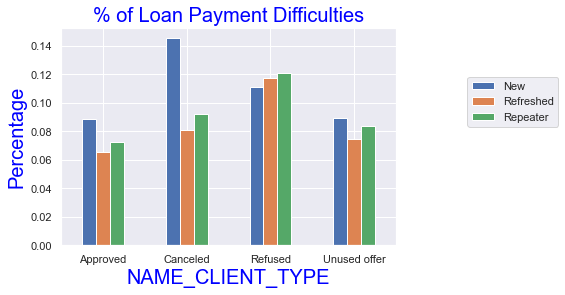

In [191]:
## % of Loan Payment Difficulties for NAME_CLIENT_TYPE
plots = table.plot.bar()
plt.title("% of Loan Payment Difficulties" ,fontsize = 20,color = "blue")
plt.xlabel("NAME_CLIENT_TYPE",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor=(1.5,0.8), loc="upper right")
plt.show()

##### Inference: It can be observed from the above graph that Client who where 'New' and had 'Cancelled' previous application tend to have more % of Loan-Payment Difficulties in current application

In [192]:
# % of Loan Payment Difficulties for NAME_CONTRACT_STATUS
table = pd.pivot_table(app_data_merge, values='TARGET', index=['NAME_CONTRACT_STATUS'],columns=['NAME_CONTRACT_TYPE'], aggfunc=np.mean)
table

NAME_CONTRACT_TYPE    Cash loans  Consumer loans  Revolving loans
NAME_CONTRACT_STATUS                                             
Approved                0.075516        0.073853         0.090343
Canceled                0.088401        0.128668         0.109254
Refused                 0.125810        0.101350         0.129050
Unused offer            0.092593        0.082337         0.000000

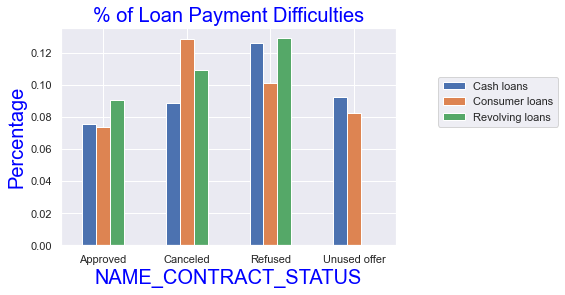

In [193]:
plots = table.plot.bar()
plt.title("% of Loan Payment Difficulties",fontsize = 20,color = "blue")
plt.xlabel("NAME_CONTRACT_STATUS",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.ylabel("Percentage",fontdict = {"fontsize":20,"fontweight":5,"color":"blue"})
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor=(1.5,0.8), loc="upper right")
plt.show()

##### Inference: It can be observed from the above graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of Loan-Payment Difficulties in current application



## 9.Insights

### Application Data
1. The count of ‘Maternity Leave’ in ‘NAME_INCOME_TYPE’ is very less and it also has maximum % of payment difficulties- around 40%. Hence, client with income type as ‘Maternity leave’ are the driving factors for Loan Defaulters


2. The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 17%. Hence, client with occupation type as ‘Low skilled Laborers’ are the driving factors for Loan Defaulters


3. The count of ‘Lower Secondary’ in ‘NAME_EDUCATION_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 11%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters


### Previous Application Data
1. The count of ‘Refusal to name the goal’ in ‘NAME_CASH_LOAN_PURPOSE’ is comparatively very less and it also has maximum % of payment difficulties- around 23%. Hence, clients who have ‘Refused to name the goal’ for cash loan in previous application are the driving factors for Loan Defaulters.


2. The count of ‘Refused’ in ‘NAME_CONTRACT_STATUS’ is comparatively less and it also has maximum % of payment difficulties- around 12%. Hence, client with contract status as ‘Refused’ in previous application are the driving factors for Loan Defaulters.


3. The count of ‘Revolving Loans’ in ‘NAME_CONTRACT_TYPE’ is comparatively very less and it also has maximum % of payment difficulties- around 10%. Hence, client with contract type as ‘Revolving loans’ in previous application are the driving factors for Loan Defaulters.


4. It can be observed from the graph that Clients with 'Revolving loans' and with 'Refused' previous application tend to have more % of payment difficulties in current application. Since the count of both 'Revolving loans' and ‘Refused’ is comparatively less(from the graphs in previous slide), clients with ‘Revolving Loans’ and ‘Refused’ previous application are driving factors for Loan Defaulters

### 5 most positive correlations


1. AMT_CREDIT	--> 	AMT_GOODS_PRICE


2. AMT_ANNUITY	--> 	AMT_GOODS_PRICE


3. AMT_CREDIT	--> 	AMT_ANNUITY


4. DAYS_BIRTH	--> 	DAYS_EMPLOYED


5. DAYS_REGISTRATION	--> 	DAYS_BIRTH


### Suggestions

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments


2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments


3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time


4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments



# THANK YOU 